In [46]:
import pandas as pd
import numpy as np
import seaborn as sn
from scipy.spatial.distance import euclidean,cosine,pdist,squareform,cdist
from IPython.display import Image
from IPython.core.display import Image, display
import PIL
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import itertools

In [13]:
import matplotlib.style as style 
style.available

['Solarize_Light2',
 'seaborn-darkgrid',
 'fast',
 'grayscale',
 '_classic_test',
 'seaborn',
 'seaborn-muted',
 'seaborn-pastel',
 'seaborn-deep',
 'seaborn-paper',
 'classic',
 'seaborn-dark',
 'fivethirtyeight',
 'seaborn-poster',
 'seaborn-white',
 'bmh',
 'ggplot',
 'seaborn-whitegrid',
 'seaborn-dark-palette',
 'dark_background',
 'seaborn-bright',
 'seaborn-colorblind',
 'tableau-colorblind10',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-notebook']

In [14]:
style.use('seaborn-poster') #sets the size of the charts

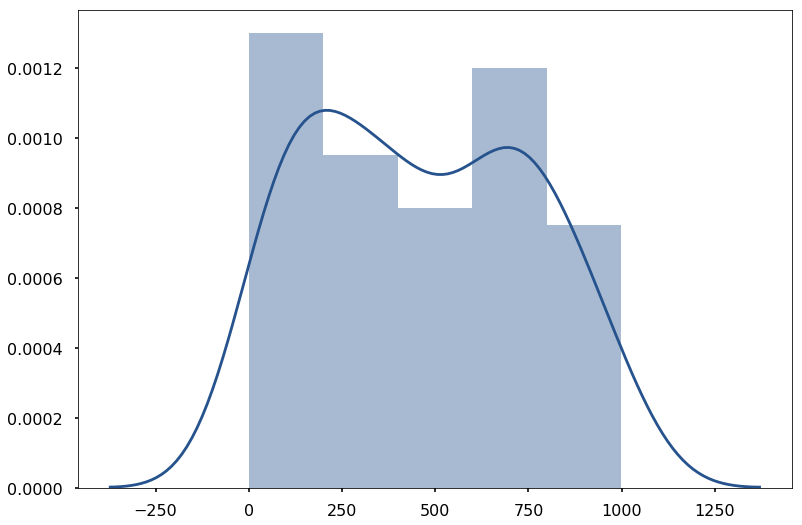

In [249]:
sns.distplot(np.random.randint(0,1000,100))

In [2]:
odf_path = '/Users/bechtel/Work/Insight/shoezam/feature_extraction/frnt_no_features_data_oxfords_boats_boots.csv'
oxf_path = '/Users/bechtel/Work/Insight/shoezam/feature_extraction/frnt_features_fc2_data_oxfords_boats_boots.csv'
oxf = pd.read_csv(oxf_path,index_col=0).values
odf = pd.read_csv(odf_path,index_col=0)


In [2]:
full_path = '/Users/bechtel/Work/Insight/shoezam/feature_extraction/full_data_oxfords_boats_boots.csv'
fulldf = pd.read_csv(full_path,index_col=0)

In [3]:
fulldf['subcategory'].unique()

array(['Boat Shoes', 'Sneakers & Athletic Shoes', 'Loafers', 'Boots',
       'Oxfords'], dtype=object)

In [4]:
slimdf = fulldf[fulldf['subcategory'].isin(['Boat Shoes', 'Boots','Oxfords'])]

In [114]:
slimdf['subcategory'].unique()

array(['Boat Shoes', 'Boots', 'Oxfords'], dtype=object)

In [47]:
slimdf = pd.read_csv('slim_data_oxfords_boats_boots.csv',index_col=0)

In [40]:
slimdf = pd.read_csv('../webapp/large_custom_model/multiclass_shoes_full_data.csv',index_col=0).reset_index(drop=True,inplace=False)

In [48]:
slimdf['subcategory'].unique()

array(['Boat Shoes', 'Boots', 'Oxfords'], dtype=object)

In [49]:
oxf = slimdf.iloc[:,14:].values
odf = slimdf.iloc[:,:14]
odf.reset_index(drop=True,inplace=True)

In [18]:
def find_top_matches(input_image_index,top_n,oxf,odf,classifier='euclidean',user_category=None,verbose=False):
        input_feature_vec = oxf[input_image_index,:][None,:]
        if user_category in ['Boots','Oxfords','Boat Shoes']:
            # define rows that belong to user category 
            user_cat_idx = odf.index[self.odf['subcategory']==user_category].tolist()
            # get numpy feature vec by subcategory 
            oxf_by_cat = oxf[user_cat_idx,:]
            # get pandas by subcategory 
            odf_by_cat = odf.iloc[user_cat_idx,:]
        else:
            # get numpy feature vec by subcategory 
            oxf_by_cat = oxf
            # get pandas by subcategory 
            odf_by_cat = odf
        if verbose:
            print("oxf_by_cat.shape : {} ".format(oxf_by_cat.shape))
            print("odf_by_cat.shape : {} ".format(odf_by_cat.shape))

            print('oxf.shape: {}'.format(oxf.shape))
        #distances = cdist(self.input_feature_vec,self.oxf, self.classifier)
        distances = cdist(input_feature_vec,oxf_by_cat, classifier)
        if verbose:
            print('distances.shape : {}'.format(distances.shape))
        best_args = np.argsort(distances[0,:])[:top_n]
        
        if verbose:
            print('distances[best_args]: \n{}'.format(distances[0,best_args]))
            print('best_args: {}'.format(best_args)) 
        best_match = best_args[0]
        similar_matches = best_args[1:]
        best_dists = distances[0,similar_matches]
        best_match_row = odf_by_cat.iloc[best_match,:]
        #best_match_row = self.odf.iloc[best_match,:]
        if verbose:
            print('best_match_row : {}'.format(best_match_row))
        top_keys = []
        top_indices = []
        best_rows = []
        for i, image_index in enumerate(similar_matches):
            #key = self.odf['key'].iloc[image_index]
            key = odf_by_cat['key'].iloc[image_index]
            best_rows.append(odf_by_cat.iloc[image_index,:])
            if key not in top_keys:
                top_keys.append(key)
                top_indices.append(image_index)
        if verbose:
            print('top_indices: {}'.format(top_indices))
            print('top_keys: {}'.format(top_keys))
        #prices = self.odf['msrp'].iloc[top_indices].values
        prices = odf_by_cat['msrp'].iloc[top_indices].values
        if verbose:
            print('prices: {}'.format(prices))
        indices_in_increasing_price = np.argsort(prices)
        lowest_price_image_index = top_indices[indices_in_increasing_price[0]]
        highest_price_image_index = top_indices[indices_in_increasing_price[-1]]

        #print('lowest_price_image_row :\n{}'.format(self.odf.iloc[lowest_price_image_index,:]))
        #print('highest_price_image_row :\n{}'.format(self.odf.iloc[highest_price_image_index,:]))
        if verbose:
            print('lowest_price_image_row :\n{}'.format(odf_by_cat.iloc[lowest_price_image_index,:]))
            print('highest_price_image_row :\n{}'.format(odf_by_cat.iloc[highest_price_image_index,:]))
            if best_match_row is not None:
                print("best_match_row is not None")
            #if self.odf.iloc[lowest_price_image_index,:] is not None:
            if odf_by_cat.iloc[lowest_price_image_index,:] is not None:
                print("self.odf.iloc[lowest_price_image_index,:] is not None")
            #if self.odf.iloc[highest_price_image_index,:] is not None:
            if odf_by_cat.iloc[highest_price_image_index,:] is not None:
                print("self.odf.iloc[highest_price_image_index,:] is not None")
        #return best_match_row,self.odf.iloc[lowest_price_image_index,:],self.odf.iloc[highest_price_image_index,:]
        return best_match_row,odf_by_cat.iloc[lowest_price_image_index,:],odf_by_cat.iloc[highest_price_image_index,:],best_rows,best_dists


In [19]:
def find_zap_matches(input_image_index,oxf,odf,classifier='euclidean',user_category=None):
        input_feature_vec = oxf[input_image_index,:][None,:]
        if user_category in ['Boots','Oxfords','Boat Shoes']:
            # define rows that belong to user category 
            user_cat_idx = odf.index[self.odf['subcategory']==user_category].tolist()
            # get numpy feature vec by subcategory 
            oxf_by_cat = oxf[user_cat_idx,:]
            # get pandas by subcategory 
            odf_by_cat = odf.iloc[user_cat_idx,:]
        else:
            # get numpy feature vec by subcategory 
            oxf_by_cat = oxf
            # get pandas by subcategory 
            odf_by_cat = odf
        print("oxf_by_cat.shape : {} ".format(oxf_by_cat.shape))
        print("odf_by_cat.shape : {} ".format(odf_by_cat.shape))

        print('oxf.shape: {}'.format(oxf.shape))
        #distances = cdist(self.input_feature_vec,self.oxf, self.classifier)
        distances = cdist(input_feature_vec,oxf_by_cat, classifier)
        print('distances.shape : {}'.format(distances.shape))
        best_args = np.argsort(distances[0,:])[:]
        
        like_product_indices = [odf_by_cat[odf_by_cat['key']==str(odf_by_cat.iloc[input_index,:]['like_product_key_{}'.format(lpi)])].index.values for lpi in range(4)]
        ranks_by_product = []
        for pi,product_indices in enumerate(like_product_indices):
            print(product_indices)
            product_ranks = []
            for image_index in product_indices:
                print('image_index : {}'.format(image_index))
                print('npwhere : {}'.format(np.where(best_args==image_index)[0]))
                product_ranks.append(np.where(best_args==image_index)[0][0])
            ranks_by_product.append(product_ranks)
                
        
                
                
        print('distances[best_args]: \n{}'.format(distances[0,best_args]))
        print('best_args: {}'.format(best_args)) 
        best_match = best_args[0]
        similar_matches = best_args[1:]
        best_match_row = odf_by_cat.iloc[best_match,:]
        #best_match_row = self.odf.iloc[best_match,:]
        print('best_match_row : {}'.format(best_match_row))
        top_keys = []
        top_indices = []
        best_rows = []
        for i, image_index in enumerate(similar_matches):
            #key = self.odf['key'].iloc[image_index]
            key = odf_by_cat['key'].iloc[image_index]
            best_rows.append(odf_by_cat.iloc[image_index,:])
            if key not in top_keys:
                top_keys.append(key)
                top_indices.append(image_index)

        return best_match_row,best_rows,ranks_by_product


In [20]:
def find_zap_ranks(input_image_index,oxf,odf,classifier='euclidean',user_category=None):
        if user_category in ['Boots','Oxfords','Boat Shoes']:
            # define rows that belong to user category 
            user_cat_idx = odf.index[odf['subcategory']==user_category].tolist()
            # get numpy feature vec by subcategory 
            oxf_by_cat = oxf[user_cat_idx,:]
            # get pandas by subcategory 
            odf_by_cat = odf.iloc[user_cat_idx,:]
            odf_by_cat.reset_index(drop=True,inplace=True)
        else:
            # get numpy feature vec by subcategory 
            oxf_by_cat = oxf
            # get pandas by subcategory 
            odf_by_cat = odf
        input_feature_vec = oxf_by_cat[input_image_index,:][None,:]

        #print("oxf_by_cat.shape : {} ".format(oxf_by_cat.shape))
        #print("odf_by_cat.shape : {} ".format(odf_by_cat.shape))

        #print('oxf.shape: {}'.format(oxf.shape))
        #distances = cdist(self.input_feature_vec,self.oxf, self.classifier)
        distances = cdist(input_feature_vec,oxf_by_cat, classifier)
        #print('distances.shape : {}'.format(distances.shape))
        best_args = np.argsort(distances[0,:])[:]
        
        like_product_indices = [odf_by_cat[odf_by_cat['key']==str(odf_by_cat.iloc[input_image_index,:]['like_product_key_{}'.format(lpi)])].index.values for lpi in range(4)]
        #for lpk in range(0,4):
            #print('like_product_key: {}'.format(odf_by_cat.iloc[input_image_index,:]['like_product_key_{}'.format(lpk)]))
        
        ranks_by_product = []
        product_placements  = []
        for pi,product_indices in enumerate(like_product_indices):
            #print('product_indices: {}'.format(product_indices))
            product_ranks = []
            pplacements = []
            for image_index in product_indices:
                #print('cur image_index key: {}'.format(odf_by_cat.iloc[image_index,:]['key']))
                #print('image_index : {}'.format(image_index))
                #print('npwhere (this is rank) : {}'.format(np.where(best_args==image_index)[0]))
                #if len(np.where(best_args==image_index)[0])>0:
                #print('n rows of odf (should be same as rank...): {}'.format(odf_by_cat.iloc[best_args[0:np.where(best_args==image_index)[0][0]],:].shape))
                #print('num unique keys : {}'.format(len(odf_by_cat.iloc[best_args[0:np.where(best_args==image_index)[0][0]],:]['key'].unique())))
                pplacements.append(len(odf_by_cat.iloc[best_args[0:np.where(best_args==image_index)[0][0]],:]['key'].unique()))
                product_ranks.append(np.where(best_args==image_index)[0][0])
            ranks_by_product.append(product_ranks)
            product_placements.append(pplacements)
                
        
    

        return ranks_by_product,product_placements

In [212]:
input_image_index=0
ranks_by_product,product_placements = find_zap_ranks(input_image_index,oxf,odf,classifier='euclidean',user_category=None)


oxf_by_cat.shape : (20768, 4096) 
odf_by_cat.shape : (20768, 14) 
distances.shape : (1, 20768)
like_product_key: boats_product_9167576_color_325
like_product_key: boats_product_7969625_color_218412
like_product_key: boats_product_9061607_color_10612
like_product_key: boats_product_8982435_color_3098
product_indices: [548 549 550 551]
cur image_index key: boats_product_9167576_color_325
image_index : 548
npwhere (this is rank) : [46]
n rows of odf (should be same as rank...): (46, 14)
num unique keys : 38
cur image_index key: boats_product_9167576_color_325
image_index : 549
npwhere (this is rank) : [11094]
n rows of odf (should be same as rank...): (11094, 14)
num unique keys : 4358
cur image_index key: boats_product_9167576_color_325
image_index : 550
npwhere (this is rank) : [201]
n rows of odf (should be same as rank...): (201, 14)
num unique keys : 117
cur image_index key: boats_product_9167576_color_325
image_index : 551
npwhere (this is rank) : [458]
n rows of odf (should be same

In [21]:
def resize_image(im_pil,basewidth=400):
    #basewidth=400
    wpercent = (basewidth/float(im_pil.size[0]))
    hsize = int((float(im_pil.size[1])*float(wpercent)))
    im_pil = im_pil.resize((basewidth,hsize), PIL.Image.ANTIALIAS)
    return im_pil

In [22]:
def display_pretty_matches(input_image_index,top_n,oxf,odf,classifier='euclidean',user_category=None):
    best_row, frugal_row, premium_row, best_matches,best_dists = find_top_matches(input_image_index,top_n,oxf,odf,classifier,user_category)
    #print('Original Image')
    #PATH = best_row['image_path']
    #display(Image(filename = PATH, width=100, height=100))
    
    
    
#     for i in range(len(best_matches)):
#         sim1_PATH = best_matches[i]['image_path']
#         like_keys = [best_row['like_product_key_{}'.format(lpi)] for lpi in range(4)]
#         zap_sim = False
#         if best_matches[i]['key'] in like_keys:
#             zap_sim = True
#         print('Similar Shoe: #{}, Zappos Similar: {}'.format(i+1,zap_sim))
#         #print('path: {}'.format(PATH))
#         display(Image(filename = sim1_PATH, width=100, height=100))
        
    bw = 600
        
    max_n = 6
    f, axarr = plt.subplots(2, max_n,figsize=(20,7))
    #f, axarr = plt.subplots(1, max_n)
    dists = []
    keys = []   
    count = 0
    sim1_PATH = best_row['image_path']
    curr_key = best_row['key']
    #print('sim1_PATH: {}'.format(sim1_PATH))
    im_pil = PIL.Image.open(sim1_PATH)
    im_pil = resize_image(im_pil,bw)
    print('subcategory: {}\t view: {}'.format(best_row['subcategory'],best_row['view']))
            
    img_array = np.array(im_pil)
    #print('img_array.shape: {}'.format(img_array.shape))
    axarr[0,count].imshow(img_array)#

    axarr[0,count].get_xaxis().set_visible(False)
    axarr[0,count].get_yaxis().set_visible(False)
    for axis in ['top','bottom','left','right']:
        axarr[0,count].spines[axis].set_linewidth(4)
        axarr[0,count].spines[axis].set_color('g')
    
    sim1_PATH = odf[(odf['key']==best_row['key']) & (odf['view']=='pair')]['image_path'].values[0]
    #curr_key = best_row['key']
    #print('sim1_PATH: {}'.format(sim1_PATH))
    im_pil = PIL.Image.open(sim1_PATH)
    im_pil = resize_image(im_pil,bw)


    img_array = np.array(im_pil)
    #print('img_array.shape: {}'.format(img_array.shape))
    axarr[1,count].imshow(img_array)#

    axarr[1,count].get_xaxis().set_visible(False)
    axarr[1,count].get_yaxis().set_visible(False)
    for axis in ['top','bottom','left','right']:
        axarr[1,count].spines[axis].set_linewidth(4)
        axarr[1,count].spines[axis].set_color('g')


    count +=1
    keys.append(curr_key)
    dists.append(0.)


    count = 1
    for i in range(len(best_matches)):
        if count>(max_n-1):
            break
        curr_key = best_matches[i]['key']
        if curr_key not in keys:
            dists.append(best_dists[i])
            sim1_PATH = best_matches[i]['image_path']

            #print('sim1_PATH: {}'.format(sim1_PATH))
            im_pil = PIL.Image.open(sim1_PATH)
            im_pil = resize_image(im_pil,bw)
            img_array = np.array(im_pil)
            #print('img_array.shape: {}'.format(img_array.shape))
            axarr[0,count].imshow(img_array)#

            axarr[0,count].get_xaxis().set_visible(False)
            axarr[0,count].get_yaxis().set_visible(False)


            sim1_PATH = odf[(odf['key']==curr_key) & (odf['view']=='pair')]['image_path'].values[0]
            #print('sim1_PATH: {}'.format(sim1_PATH))
            im_pil = PIL.Image.open(sim1_PATH)
            im_pil = resize_image(im_pil,bw)
            img_array = np.array(im_pil)
            #print('img_array.shape: {}'.format(img_array.shape))
            axarr[1,count].imshow(img_array)#

            axarr[1,count].get_xaxis().set_visible(False)
            axarr[1,count].get_yaxis().set_visible(False)
            count +=1
            keys.append(curr_key)
            #axarr[i,j].axhline(linewidth=4, color="r")        # inc. width of x-axis and color it green
            #axarr[i,j].axvline(linewidth=4, color="r")  
    plt.subplots_adjust(wspace=0.01, hspace=0.01)
    plt.savefig('dist_matches.png',dpi=300)
    plt.show()
    print(dists)

In [23]:
def display_pretty_matches_and_random_and_zap_with_view(input_image_index,top_n,oxf,odf,classifier='euclidean',user_category=None):
    best_row, frugal_row, premium_row, best_matches,best_dists = find_top_matches(input_image_index,top_n,oxf,odf,classifier,user_category)
    zap_matches = odf[odf['key'].isin([best_row['like_product_key_{}'.format(lpk)] for lpk in range(4)]) & (odf['view']=='pair')]['image_path'].values
    if len(zap_matches)<4:
        return False
    #print('Original Image')
    #PATH = best_row['image_path']
    #display(Image(filename = PATH, width=100, height=100))
    
    
    print('len(zap_matches): {}'.format(len(zap_matches)))
   
#     for i in range(len(best_matches)):
#         sim1_PATH = best_matches[i]['image_path']
#         like_keys = [best_row['like_product_key_{}'.format(lpi)] for lpi in range(4)]
#         zap_sim = False
#         if best_matches[i]['key'] in like_keys:
#             zap_sim = True
#         print('Similar Shoe: #{}, Zappos Similar: {}'.format(i+1,zap_sim))
#         #print('path: {}'.format(PATH))
#         display(Image(filename = sim1_PATH, width=100, height=100))
        
    bw = 600
        
    max_n = 5
    f, axarr = plt.subplots(4, max_n,figsize=(20,10))
    #f, axarr = plt.subplots(1, max_n)
    dists = []
    keys = []   
    count = 0
    print('current_image url:\n{}'.format(best_row['url']))
    
    
        ### Current IMAGE ###
    sim1_PATH = best_row['image_path']
    curr_key = best_row['key']
    #print('sim1_PATH: {}'.format(sim1_PATH))
    im_pil = PIL.Image.open(sim1_PATH)
    im_pil = resize_image(im_pil,bw)
    print('subcategory: {}\t view: {}'.format(best_row['subcategory'],best_row['view']))
            
    img_array = np.array(im_pil)
    #print('img_array.shape: {}'.format(img_array.shape))
    axarr[0,count].imshow(img_array)#

    axarr[0,count].get_xaxis().set_visible(False)
    axarr[0,count].get_yaxis().set_visible(False)
    for axis in ['top','bottom','left','right']:
        axarr[0,count].spines[axis].set_linewidth(4)
        axarr[0,count].spines[axis].set_color('g')
    ### Current IMAGE ###
    
    
    
    
    
    ### Current IMAGE ###
    #sim1_PATH = best_row['image_path']
    sim1_PATH = odf[(odf['key']==best_row['key']) & (odf['view']=='pair')]['image_path'].values[0]

    curr_key = best_row['key']
    #print('sim1_PATH: {}'.format(sim1_PATH))
    im_pil = PIL.Image.open(sim1_PATH)
    im_pil = resize_image(im_pil,bw)
    print('subcategory: {}\t view: {}'.format(best_row['subcategory'],best_row['view']))
            
    img_array = np.array(im_pil)
    #print('img_array.shape: {}'.format(img_array.shape))
    axarr[1,count].imshow(img_array)#

    axarr[1,count].get_xaxis().set_visible(False)
    axarr[1,count].get_yaxis().set_visible(False)
    for axis in ['top','bottom','left','right']:
        axarr[1,count].spines[axis].set_linewidth(4)
        axarr[1,count].spines[axis].set_color('g')
    ### Current IMAGE ###

    
    ### PAIR IMAGE ###
    sim1_PATH = odf[(odf['key']==best_row['key']) & (odf['view']=='pair')]['image_path'].values[0]
    #curr_key = best_row['key']
    #print('sim1_PATH: {}'.format(sim1_PATH))
    im_pil = PIL.Image.open(sim1_PATH)
    im_pil = resize_image(im_pil,bw)


    img_array = np.array(im_pil)
    #print('img_array.shape: {}'.format(img_array.shape))
    axarr[2,count].imshow(img_array)#

    axarr[2,count].get_xaxis().set_visible(False)
    axarr[2,count].get_yaxis().set_visible(False)
    for axis in ['top','bottom','left','right']:
        axarr[2,count].spines[axis].set_linewidth(4)
        axarr[2,count].spines[axis].set_color('g')
    ### PAIR IMAGE ###
        
        
        
    ### RANDOM
    #print('img_array.shape: {}'.format(img_array.shape))
    axarr[3,count].imshow(img_array)#

    axarr[3,count].get_xaxis().set_visible(False)
    axarr[3,count].get_yaxis().set_visible(False)
    for axis in ['top','bottom','left','right']:
        axarr[3,count].spines[axis].set_linewidth(4)
        axarr[3,count].spines[axis].set_color('g')
    ### RANDOM

    count +=1
    keys.append(curr_key)
    dists.append(0.)


    count = 1
    for i in range(len(best_matches)):
        if count>(max_n-1):
            break
        curr_key = best_matches[i]['key']
        if curr_key not in keys:
            dists.append(best_dists[i])
            
            ### CURRENT IMAGE ###
            sim1_PATH = best_matches[i]['image_path']

            #print('sim1_PATH: {}'.format(sim1_PATH))
            im_pil = PIL.Image.open(sim1_PATH)
            im_pil = resize_image(im_pil,bw)
            img_array = np.array(im_pil)
            #print('img_array.shape: {}'.format(img_array.shape))
            axarr[0,count].imshow(img_array)#

            axarr[0,count].get_xaxis().set_visible(False)
            axarr[0,count].get_yaxis().set_visible(False)
            ### CURRENT IMAGE ###
            
            ### PAIR IMAGE ###
            sim1_PATH = odf[(odf['key']==curr_key) & (odf['view']=='pair')]['image_path'].values[0]
            #print('sim1_PATH: {}'.format(sim1_PATH))
            im_pil = PIL.Image.open(sim1_PATH)
            im_pil = resize_image(im_pil,bw)
            img_array = np.array(im_pil)
            #print('img_array.shape: {}'.format(img_array.shape))
            axarr[1,count].imshow(img_array)#

            axarr[1,count].get_xaxis().set_visible(False)
            axarr[1,count].get_yaxis().set_visible(False)
            ### PAIR IMAGE ###  
            
            
            ### ZAP MATCH IMAGE ###
            #sim1_PATH = zap_matches.iloc[count-1]['image_path']
            if count<=len(zap_matches):
                sim1_PATH = zap_matches[count-1]

                #print('sim1_PATH: {}'.format(sim1_PATH))
                im_pil = PIL.Image.open(sim1_PATH)
                im_pil = resize_image(im_pil,bw)
                img_array = np.array(im_pil)
                #print('img_array.shape: {}'.format(img_array.shape))
                axarr[2,count].imshow(img_array)#
            else:
                img_array[:,:,:] = 255
                axarr[2,count].imshow(img_array)#

            axarr[2,count].get_xaxis().set_visible(False)
            axarr[2,count].get_yaxis().set_visible(False)
            ### ZAP MATCH IMAGE ###  


            
            ### RANDOM IMAGE ###
            index = np.random.randint(oxf.shape[0])
            rand_key = odf.iloc[index]['key']
            sim1_PATH = odf[(odf['key']==rand_key) & (odf['view']=='pair')]['image_path'].values[0]
            #print('sim1_PATH: {}'.format(sim1_PATH))
            im_pil = PIL.Image.open(sim1_PATH)
            im_pil = resize_image(im_pil,bw)
            img_array = np.array(im_pil)
            #print('img_array.shape: {}'.format(img_array.shape))
            axarr[3,count].imshow(img_array)#

            axarr[3,count].get_xaxis().set_visible(False)
            axarr[3,count].get_yaxis().set_visible(False)
            ### RANDOM IMAGE ###                        

            count +=1
            keys.append(curr_key)
            #axarr[i,j].axhline(linewidth=4, color="r")        # inc. width of x-axis and color it green
            #axarr[i,j].axvline(linewidth=4, color="r")  
    plt.subplots_adjust(wspace=0.01, hspace=0.01)
    plt.savefig('dist_matches_and_random.png',dpi=300)
    plt.show()
    print(dists)
    return True

len(zap_matches): 4
current_image url:
https://www.zappos.com/p/justin-aransas-chocolate-brown/product/9066694/color/289
subcategory: Boots	 view: top
subcategory: Boots	 view: top


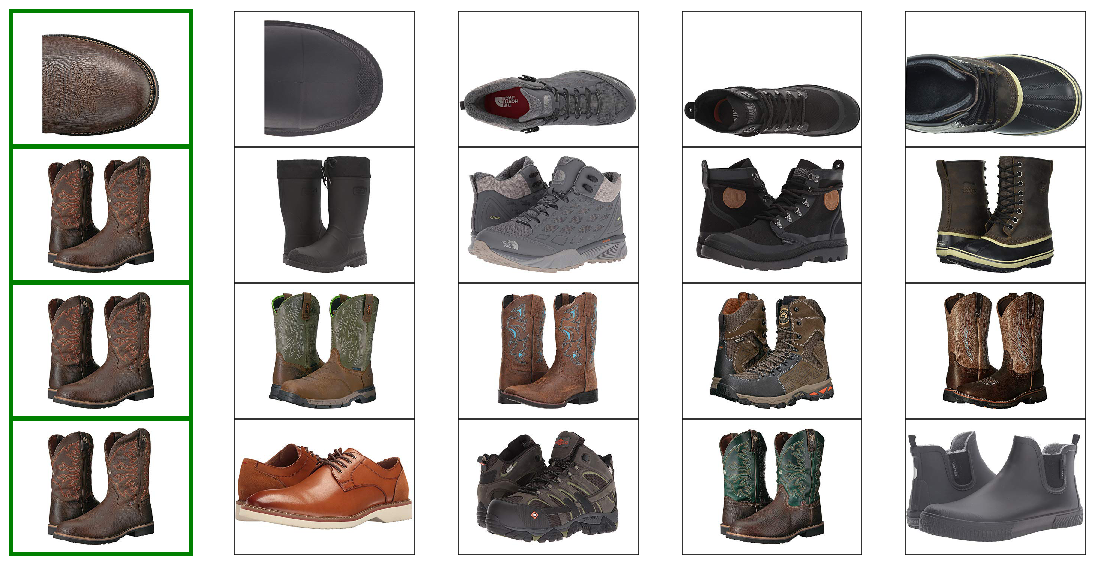

[0.0, 552.263721303865, 554.9731430108704, 592.8806218543706, 628.9821026986735]


In [24]:
count = 0
while count<1:
    i = np.random.choice(odf[(odf['subcategory']=='Boots')&(odf['view']=='top')].index.values,1)[0]
    tmp = display_pretty_matches_and_random_and_zap_with_view(i,20,oxf,odf)
    count += int(tmp)

In [56]:
def display_pretty_matches_and_random_and_zap(input_image_index,top_n,oxf,odf,classifier='euclidean',user_category=None):
    best_row, frugal_row, premium_row, best_matches,best_dists = find_top_matches(input_image_index,top_n,oxf,odf,classifier,user_category)
    zap_matches = odf[odf['key'].isin([best_row['like_product_key_{}'.format(lpk)] for lpk in range(4)]) & (odf['view']=='pair')]['image_path'].values
    if len(zap_matches)<4:
        return False
    #print('Original Image')
    #PATH = best_row['image_path']
    #display(Image(filename = PATH, width=100, height=100))
    
    
    print('len(zap_matches): {}'.format(len(zap_matches)))
   
#     for i in range(len(best_matches)):
#         sim1_PATH = best_matches[i]['image_path']
#         like_keys = [best_row['like_product_key_{}'.format(lpi)] for lpi in range(4)]
#         zap_sim = False
#         if best_matches[i]['key'] in like_keys:
#             zap_sim = True
#         print('Similar Shoe: #{}, Zappos Similar: {}'.format(i+1,zap_sim))
#         #print('path: {}'.format(PATH))
#         display(Image(filename = sim1_PATH, width=100, height=100))
        
    bw = 600
        
    max_n = 5
    f, axarr = plt.subplots(3, max_n,figsize=(20,7))
    #f, axarr = plt.subplots(1, max_n)
    dists = []
    keys = []   
    count = 0
    print('current_image url:\n{}'.format(best_row['url']))
    ### Current IMAGE ###
    #sim1_PATH = best_row['image_path']
    sim1_PATH = odf[(odf['key']==best_row['key']) & (odf['view']=='pair')]['image_path'].values[0]

    curr_key = best_row['key']
    #print('sim1_PATH: {}'.format(sim1_PATH))
    im_pil = PIL.Image.open(sim1_PATH)
    im_pil = resize_image(im_pil,bw)
    print('subcategory: {}\t view: {}'.format(best_row['subcategory'],best_row['view']))
            
    img_array = np.array(im_pil)
    #print('img_array.shape: {}'.format(img_array.shape))
    axarr[0,count].imshow(img_array)#

    axarr[0,count].get_xaxis().set_visible(False)
    axarr[0,count].get_yaxis().set_visible(False)
    for axis in ['top','bottom','left','right']:
        axarr[0,count].spines[axis].set_linewidth(4)
        axarr[0,count].spines[axis].set_color('g')
    ### Current IMAGE ###

    
    ### PAIR IMAGE ###
    sim1_PATH = odf[(odf['key']==best_row['key']) & (odf['view']=='pair')]['image_path'].values[0]
    #curr_key = best_row['key']
    #print('sim1_PATH: {}'.format(sim1_PATH))
    im_pil = PIL.Image.open(sim1_PATH)
    im_pil = resize_image(im_pil,bw)


    img_array = np.array(im_pil)
    #print('img_array.shape: {}'.format(img_array.shape))
    axarr[1,count].imshow(img_array)#

    axarr[1,count].get_xaxis().set_visible(False)
    axarr[1,count].get_yaxis().set_visible(False)
    for axis in ['top','bottom','left','right']:
        axarr[1,count].spines[axis].set_linewidth(4)
        axarr[1,count].spines[axis].set_color('g')
    ### PAIR IMAGE ###
        
        
        
    ### RANDOM
    #print('img_array.shape: {}'.format(img_array.shape))
    axarr[2,count].imshow(img_array)#

    axarr[2,count].get_xaxis().set_visible(False)
    axarr[2,count].get_yaxis().set_visible(False)
    for axis in ['top','bottom','left','right']:
        axarr[2,count].spines[axis].set_linewidth(4)
        axarr[2,count].spines[axis].set_color('g')
    ### RANDOM

    count +=1
    keys.append(curr_key)
    dists.append(0.)


    count = 1
    for i in range(len(best_matches)):
        if count>(max_n-1):
            break
        curr_key = best_matches[i]['key']
        if curr_key not in keys:
            dists.append(best_dists[i])
            
#             ### CURRENT IMAGE ###
#             sim1_PATH = best_matches[i]['image_path']

#             #print('sim1_PATH: {}'.format(sim1_PATH))
#             im_pil = PIL.Image.open(sim1_PATH)
#             im_pil = resize_image(im_pil,bw)
#             img_array = np.array(im_pil)
#             #print('img_array.shape: {}'.format(img_array.shape))
#             axarr[0,count].imshow(img_array)#

#             axarr[0,count].get_xaxis().set_visible(False)
#             axarr[0,count].get_yaxis().set_visible(False)
#             ### CURRENT IMAGE ###
            ### ZAP MATCH IMAGE ###
            #sim1_PATH = zap_matches.iloc[count-1]['image_path']
            if count<=len(zap_matches):
                sim1_PATH = zap_matches[count-1]

                #print('sim1_PATH: {}'.format(sim1_PATH))
                im_pil = PIL.Image.open(sim1_PATH)
                im_pil = resize_image(im_pil,bw)
                img_array = np.array(im_pil)
                #print('img_array.shape: {}'.format(img_array.shape))
                axarr[1,count].imshow(img_array)#
            else:
                img_array[:,:,:] = 255
                axarr[1,count].imshow(img_array)#

            axarr[1,count].get_xaxis().set_visible(False)
            axarr[1,count].get_yaxis().set_visible(False)
            ### ZAP MATCH IMAGE ###  

            ### PAIR IMAGE ###
            sim1_PATH = odf[(odf['key']==curr_key) & (odf['view']=='pair')]['image_path'].values[0]
            #print('sim1_PATH: {}'.format(sim1_PATH))
            im_pil = PIL.Image.open(sim1_PATH)
            im_pil = resize_image(im_pil,bw)
            img_array = np.array(im_pil)
            #print('img_array.shape: {}'.format(img_array.shape))
            axarr[0,count].imshow(img_array)#

            axarr[0,count].get_xaxis().set_visible(False)
            axarr[0,count].get_yaxis().set_visible(False)
            ### PAIR IMAGE ###  
            
            ### RANDOM IMAGE ###
            index = np.random.randint(oxf.shape[0])
            rand_key = odf.iloc[index]['key']
            sim1_PATH = odf[(odf['key']==rand_key) & (odf['view']=='pair')]['image_path'].values[0]
            #print('sim1_PATH: {}'.format(sim1_PATH))
            im_pil = PIL.Image.open(sim1_PATH)
            im_pil = resize_image(im_pil,bw)
            img_array = np.array(im_pil)
            #print('img_array.shape: {}'.format(img_array.shape))
            axarr[2,count].imshow(img_array)#

            axarr[2,count].get_xaxis().set_visible(False)
            axarr[2,count].get_yaxis().set_visible(False)
            ### RANDOM IMAGE ###                        

            count +=1
            keys.append(curr_key)
            #axarr[i,j].axhline(linewidth=4, color="r")        # inc. width of x-axis and color it green
            #axarr[i,j].axvline(linewidth=4, color="r")  
    plt.subplots_adjust(wspace=0.01, hspace=0.01)
    plt.savefig('dist_matches_and_random.png',dpi=300)
    plt.show()
    print(dists)
    return True

len(zap_matches): 4
current_image url:
https://www.zappos.com/p/etro-suede-lace-up-boot-tan/product/9091936/color/20
subcategory: Boots	 view: pair


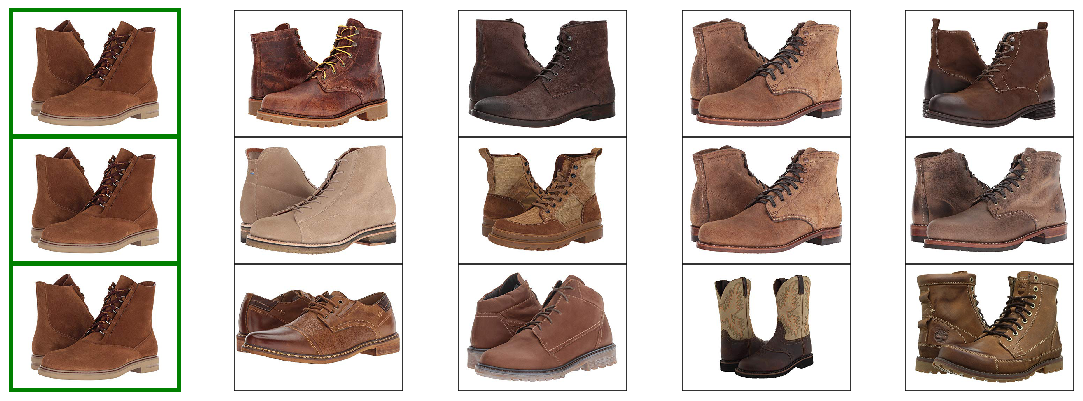

[0.0, 49.883258373366274, 52.310495006282, 53.82566469245531, 54.34966081535057]


In [71]:
count = 0
while count<1:
    #i = np.random.choice(odf[odf['subcategory']=='Boots'].index.values,1)[0]
    i = np.random.choice(odf.index.values,1)[0]
    tmp = display_pretty_matches_and_random_and_zap(i,20,oxf,odf)
    count += int(tmp)

current_image url:
https://www.zappos.com/p/deer-stags-rhodes-brown-blue/product/9110307/color/4323
subcategory: Boots	 view: pair


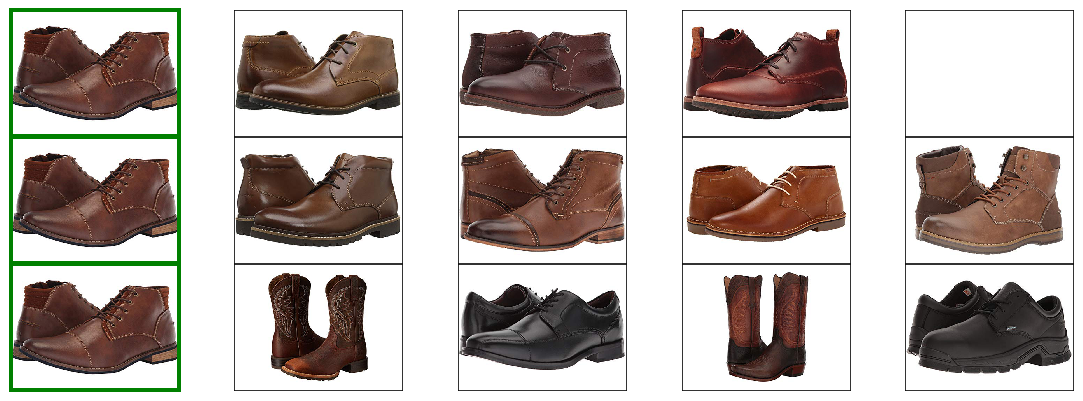

[0.0, 49.211689102212141, 49.259710758982131, 50.361228844156159, 50.38059991500014]
current_image url:
https://www.zappos.com/p/merrell-chameleon-7-storm-mid-gore-tex-castlerock/product/9065539/color/92872
subcategory: Boots	 view: top


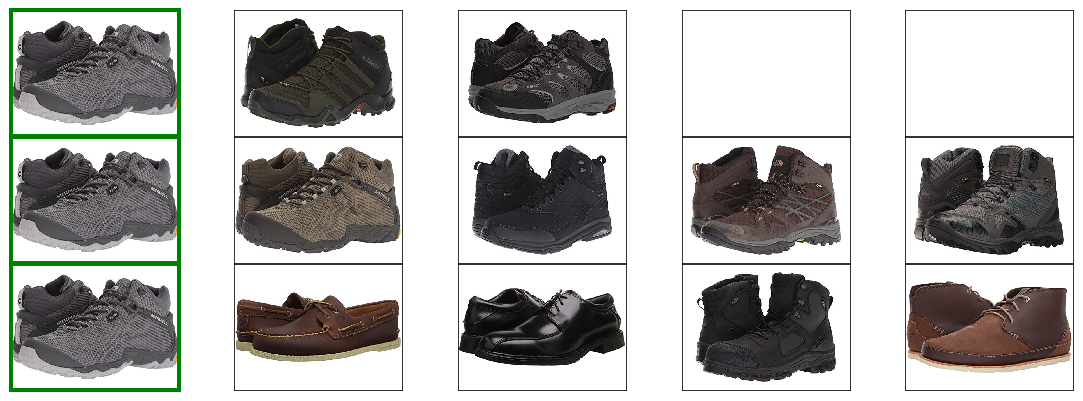

[0.0, 41.181943444945162, 46.995080676705506, 47.649057779502257, 49.334113079941908]
current_image url:
https://www.zappos.com/p/georgia-boot-6-wedge-boot-gold-coast-barracuda/product/7157987/color/33133
subcategory: Boots	 view: left


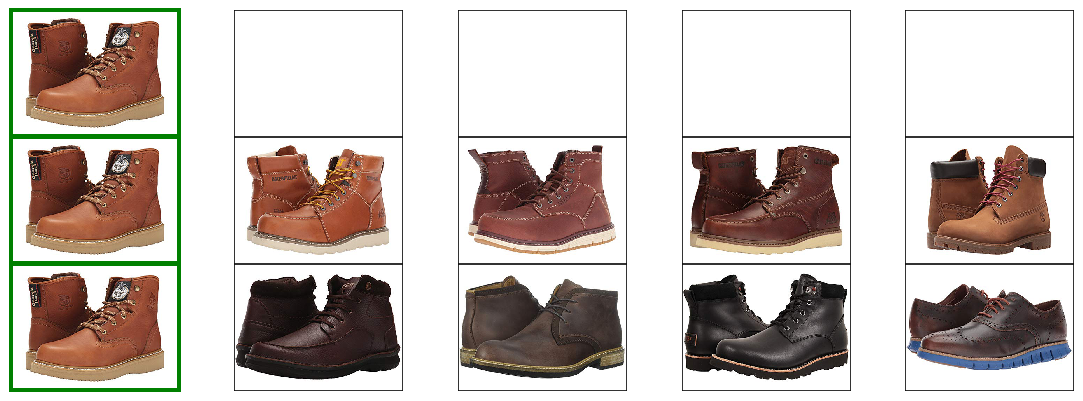

[0.0, 43.498440253497719, 46.188588647455603, 46.26946476609038, 46.609976998626266]
current_image url:
https://www.zappos.com/p/giorgio-brutini-blackjack-black/product/7214805/color/3
subcategory: Boots	 view: left


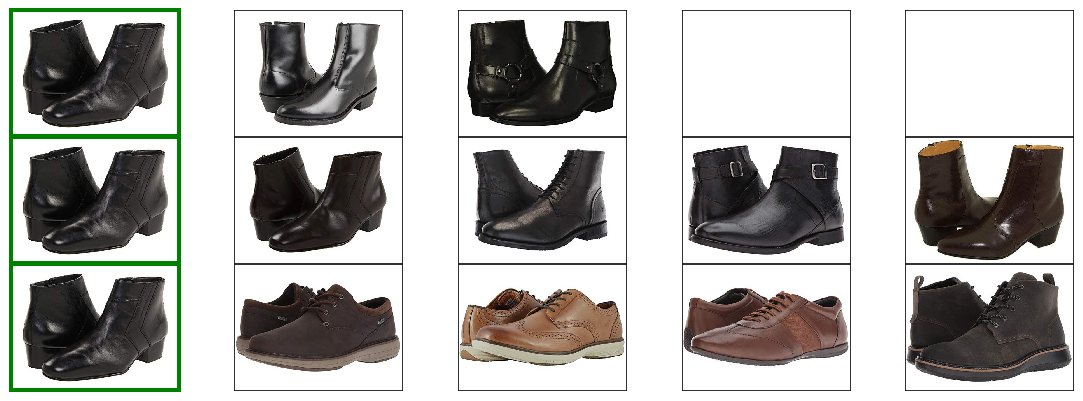

[0.0, 42.164850070660208, 43.585749443828988, 45.481616089091744, 45.660768373252225]
current_image url:
https://www.zappos.com/p/ugg-classic-mini-bomber-bomber-jacket-chestnut/product/8553816/color/232684
subcategory: Boots	 view: right


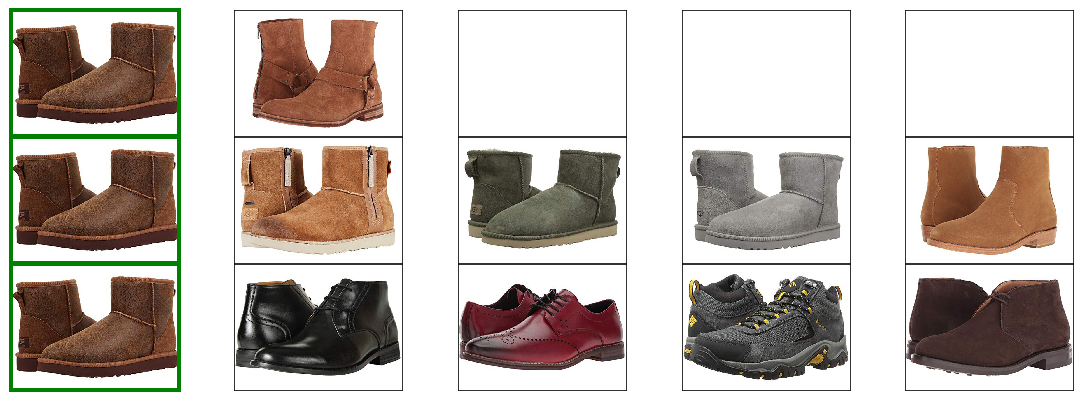

[0.0, 37.240011037660508, 40.834205200633235, 43.952723165389479, 44.598907659687541]


In [142]:
for i in np.random.choice(odf[odf['subcategory']=='Boots'].index.values,5):
    display_pretty_matches_and_random_and_zap(i,20,oxf,odf)

In [26]:
def display_pretty_matches_and_random(input_image_index,top_n,oxf,odf,classifier='euclidean',user_category=None):
    best_row, frugal_row, premium_row, best_matches,best_dists = find_top_matches(input_image_index,top_n,oxf,odf,classifier,user_category)
    #print('Original Image')
    #PATH = best_row['image_path']
    #display(Image(filename = PATH, width=100, height=100))
    
    
    
#     for i in range(len(best_matches)):
#         sim1_PATH = best_matches[i]['image_path']
#         like_keys = [best_row['like_product_key_{}'.format(lpi)] for lpi in range(4)]
#         zap_sim = False
#         if best_matches[i]['key'] in like_keys:
#             zap_sim = True
#         print('Similar Shoe: #{}, Zappos Similar: {}'.format(i+1,zap_sim))
#         #print('path: {}'.format(PATH))
#         display(Image(filename = sim1_PATH, width=100, height=100))
        
    bw = 600
        
    max_n = 6
    f, axarr = plt.subplots(3, max_n,figsize=(20,7))
    #f, axarr = plt.subplots(1, max_n)
    dists = []
    keys = []   
    count = 0
    
    ### Current IMAGE ###
    sim1_PATH = best_row['image_path']
    curr_key = best_row['key']
    #print('sim1_PATH: {}'.format(sim1_PATH))
    im_pil = PIL.Image.open(sim1_PATH)
    im_pil = resize_image(im_pil,bw)
    print('subcategory: {}\t view: {}'.format(best_row['subcategory'],best_row['view']))
            
    img_array = np.array(im_pil)
    #print('img_array.shape: {}'.format(img_array.shape))
    axarr[0,count].imshow(img_array)#

    axarr[0,count].get_xaxis().set_visible(False)
    axarr[0,count].get_yaxis().set_visible(False)
    for axis in ['top','bottom','left','right']:
        axarr[0,count].spines[axis].set_linewidth(4)
        axarr[0,count].spines[axis].set_color('g')
    ### Current IMAGE ###

    
    ### PAIR IMAGE ###
    sim1_PATH = odf[(odf['key']==best_row['key']) & (odf['view']=='pair')]['image_path'].values[0]
    #curr_key = best_row['key']
    #print('sim1_PATH: {}'.format(sim1_PATH))
    im_pil = PIL.Image.open(sim1_PATH)
    im_pil = resize_image(im_pil,bw)


    img_array = np.array(im_pil)
    #print('img_array.shape: {}'.format(img_array.shape))
    axarr[1,count].imshow(img_array)#

    axarr[1,count].get_xaxis().set_visible(False)
    axarr[1,count].get_yaxis().set_visible(False)
    for axis in ['top','bottom','left','right']:
        axarr[1,count].spines[axis].set_linewidth(4)
        axarr[1,count].spines[axis].set_color('g')
    ### PAIR IMAGE ###
        
        
        
    ### RANDOM
    #print('img_array.shape: {}'.format(img_array.shape))
    axarr[2,count].imshow(img_array)#

    axarr[2,count].get_xaxis().set_visible(False)
    axarr[2,count].get_yaxis().set_visible(False)
    for axis in ['top','bottom','left','right']:
        axarr[2,count].spines[axis].set_linewidth(4)
        axarr[2,count].spines[axis].set_color('g')
    ### RANDOM

    count +=1
    keys.append(curr_key)
    dists.append(0.)


    count = 1
    for i in range(len(best_matches)):
        if count>(max_n-1):
            break
        curr_key = best_matches[i]['key']
        if curr_key not in keys:
            dists.append(best_dists[i])
            
            ### CURRENT IMAGE ###
            sim1_PATH = best_matches[i]['image_path']

            #print('sim1_PATH: {}'.format(sim1_PATH))
            im_pil = PIL.Image.open(sim1_PATH)
            im_pil = resize_image(im_pil,bw)
            img_array = np.array(im_pil)
            #print('img_array.shape: {}'.format(img_array.shape))
            axarr[0,count].imshow(img_array)#

            axarr[0,count].get_xaxis().set_visible(False)
            axarr[0,count].get_yaxis().set_visible(False)
            ### CURRENT IMAGE ###

            ### PAIR IMAGE ###
            sim1_PATH = odf[(odf['key']==curr_key) & (odf['view']=='pair')]['image_path'].values[0]
            #print('sim1_PATH: {}'.format(sim1_PATH))
            im_pil = PIL.Image.open(sim1_PATH)
            im_pil = resize_image(im_pil,bw)
            img_array = np.array(im_pil)
            #print('img_array.shape: {}'.format(img_array.shape))
            axarr[1,count].imshow(img_array)#

            axarr[1,count].get_xaxis().set_visible(False)
            axarr[1,count].get_yaxis().set_visible(False)
            ### PAIR IMAGE ###  
            
            ### RANDOM IMAGE ###
            index = np.random.randint(oxf.shape[0])
            rand_key = odf.iloc[index]['key']
            sim1_PATH = odf[(odf['key']==rand_key) & (odf['view']=='pair')]['image_path'].values[0]
            #print('sim1_PATH: {}'.format(sim1_PATH))
            im_pil = PIL.Image.open(sim1_PATH)
            im_pil = resize_image(im_pil,bw)
            img_array = np.array(im_pil)
            #print('img_array.shape: {}'.format(img_array.shape))
            axarr[2,count].imshow(img_array)#

            axarr[2,count].get_xaxis().set_visible(False)
            axarr[2,count].get_yaxis().set_visible(False)
            ### RANDOM IMAGE ###                        

            count +=1
            keys.append(curr_key)
            #axarr[i,j].axhline(linewidth=4, color="r")        # inc. width of x-axis and color it green
            #axarr[i,j].axvline(linewidth=4, color="r")  
    plt.subplots_adjust(wspace=0.01, hspace=0.01)
    plt.savefig('dist_matches_and_random.png',dpi=300)
    plt.show()
    print(dists)

subcategory: Oxfords	 view: top


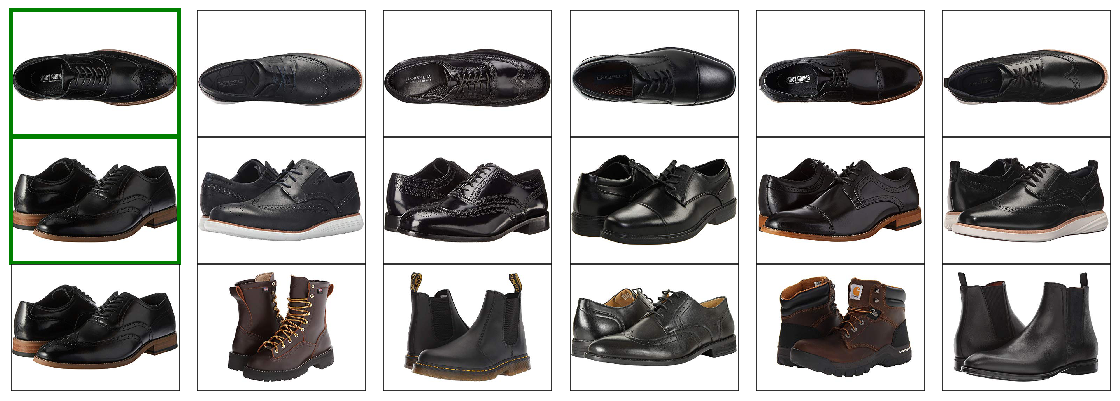

[0.0, 37.88764776456884, 43.032870665067364, 43.555667924531903, 43.641335276842682, 44.08606945291907]


In [260]:
for i in np.random.choice(odf[(odf['subcategory']=='Oxfords')&(odf['view']=='top')].index.values,1):
    display_pretty_matches_and_random(i,20,oxf,odf)

In [61]:
ranks = [[4,5,3,2,1],[2,4,4,5,4],[4,4,4,3,2],[3,4,4,2,5],[4,3,4,4,3]]


subcategory: Boots	 view: pair


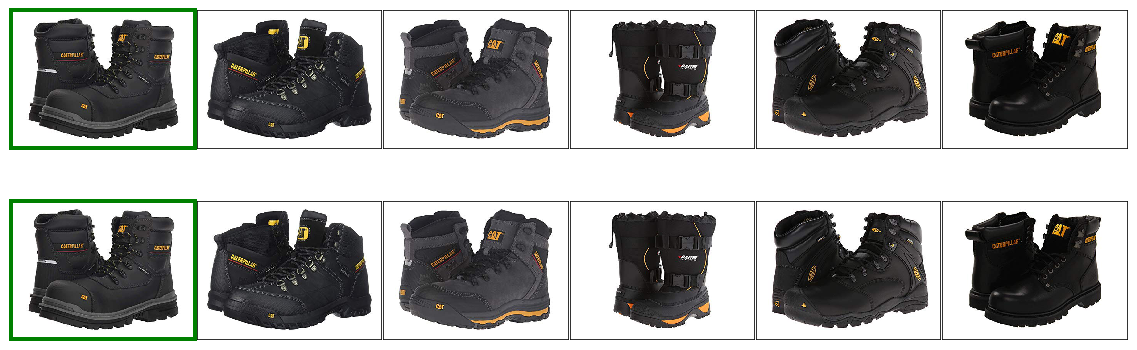

[0.0, 54.513374106825999, 57.782655504171387, 61.26991181695854, 61.287712655756671, 61.352166083254069]
subcategory: Boots	 view: left


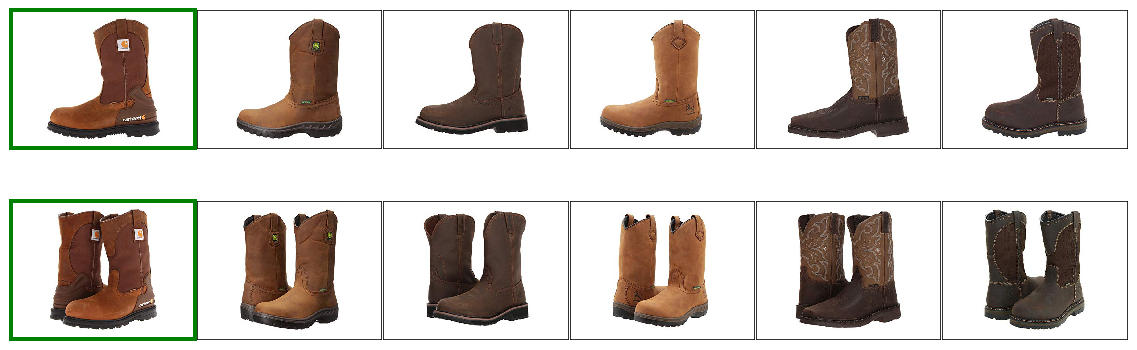

[0.0, 41.051956715988389, 41.537870212546416, 42.503032254913357, 42.795936383353606, 42.80175255056195]
subcategory: Boots	 view: right


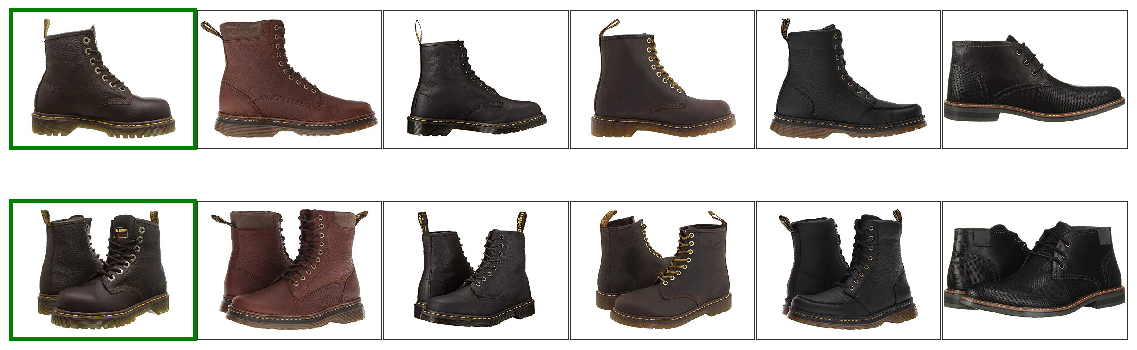

[0.0, 39.549851510047354, 44.096681633784023, 45.114837580662716, 46.220702166971833, 47.262877296353196]
subcategory: Oxfords	 view: left


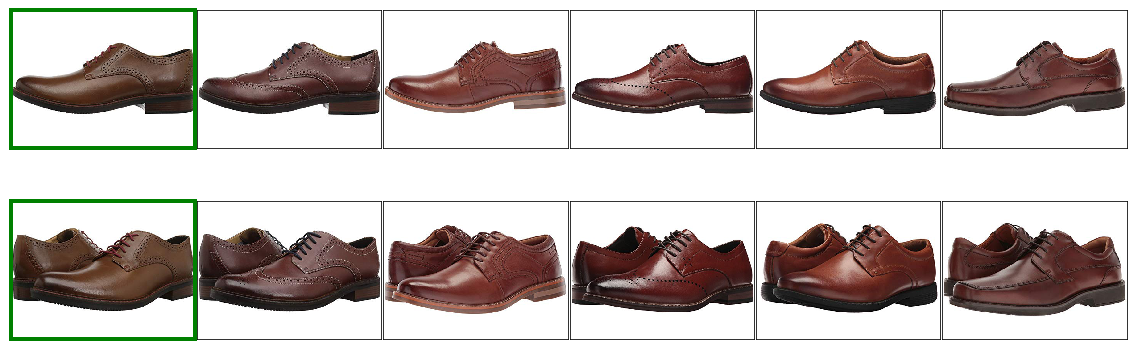

[0.0, 35.15717867226185, 35.475162788168646, 36.479688339241498, 37.347740861984114, 37.624601681541925]
subcategory: Oxfords	 view: right


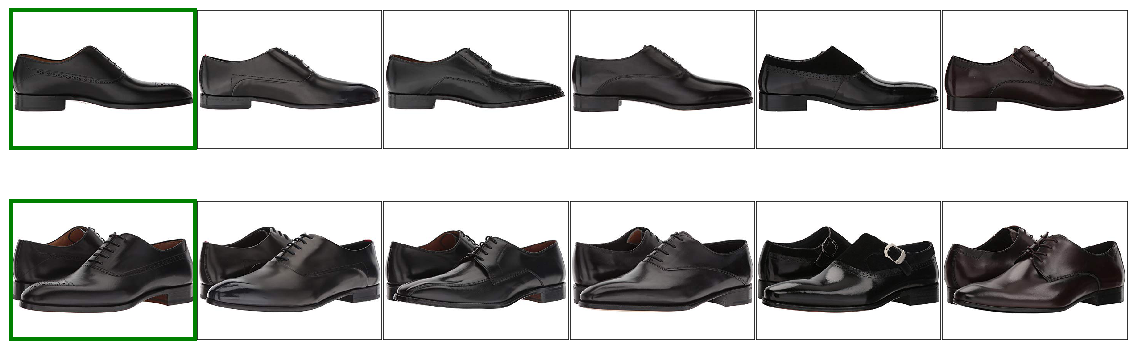

[0.0, 26.990311232489926, 27.147013243199954, 28.658438064396346, 29.650131787329777, 30.296406291993783]


In [94]:
for i in np.random.choice(np.arange(oxf.shape[0]),5):
    display_pretty_matches(i,20,oxf,odf)

In [27]:
def display_matches(input_image_index,top_n,oxf,odf,classifier='euclidean',user_category=None):
    best_row, frugal_row, premium_row, best_matches = find_top_matches(input_image_index,top_n,oxf,odf,classifier,user_category)
    print('Original Image')
    PATH = best_row['image_path']
    display(Image(filename = PATH, width=100, height=100))
    for i in range(len(best_matches)):
        sim1_PATH = best_matches[i]['image_path']
        like_keys = [best_row['like_product_key_{}'.format(lpi)] for lpi in range(4)]
        zap_sim = False
        if best_matches[i]['key'] in like_keys:
            zap_sim = True
        print('Similar Shoe: #{}, Zappos Similar: {}'.format(i+1,zap_sim))
        #print('path: {}'.format(PATH))
        display(Image(filename = sim1_PATH, width=100, height=100))

In [28]:
def calc_min_product_ranks(num,oxf,odf,classifier='euclidean',user_category=None):
    min_product_ranks = []
    prod_placements = []
    if user_category is None:
        ind_list = np.random.choice(oxf.shape[0],num)
    elif user_category in ['Boat Shoes','Boots','Oxfords']:
        ind_list = np.random.choice(odf[odf['subcategory']==user_category].shape[0],num)
    for i in ind_list:
        ranks_by_product,product_placements = find_zap_ranks(i,oxf,odf,user_category=user_category)
        count = 0
        mins = []
        placements = []
        for like_product_list,pplacement in zip(ranks_by_product,product_placements):
            #if like_product_list is not None and len(like_product_list)==4:
            if like_product_list is not None and len(like_product_list)>0:

                mins.append(min(like_product_list))
                #placements.append(pplacement[np.argmin(like_product_list)])
                placements.append(min(pplacement))
                #min_product_ranks.append(min(like_product_list))
                count +=1
        prod_placements.append(placements)
        min_product_ranks.append(mins)
        #mins = [min(like_product_list) for like_product_list in ranks_by_product]
        #avg = sum(mins)/float(count)
        #average_mins_by_product.append(avg)
    return min_product_ranks,prod_placements

In [29]:
def calc_rand_and_match_distributions(sample_size, odf, oxf,user_category):
    oxf = oxf[odf['subcategory']==user_category,:]
    odf = odf[odf['subcategory']==user_category].reset_index(inplace=False,drop=True)
    print('odf.shape: {}'.format(odf.shape))
    print('oxf.shape: {}'.format(oxf.shape))
    preds = []
    preds_left_and_right = []
    preds_top = []
    preds_pair = []
    noise_vec = []
    for j in range(10):
        rand_sample = np.random.choice(oxf.shape[0],sample_size)
        
        rand_key = odf.iloc[np.random.randint(1,oxf.shape[0]),:]['key']
        for i in rand_sample:
            input_feature_vec = oxf[i,:][None,:]
            curr_key = odf.iloc[i,:]['key']
            curr_view = odf.iloc[i,:]['view']
            #print('key: {}'.format(curr_key))
            #print('oxf.shape: {}'.format(oxf.shape))
            #distances = cdist(self.input_feature_vec,self.oxf, self.classifier)
            distances = cdist(input_feature_vec,oxf, 'euclidean')
            #print('distances.shape : {}'.format(distances.shape))
            best_args = np.argsort(distances[0,:])[1:]
            tmpdf = odf.iloc[best_args,:].reset_index(drop=True)
            indexes = tmpdf[tmpdf['key']==curr_key].index.values
            #print('indexes: {}'.format(indexes.index.values))
            min_ind = min(indexes)+1
            if curr_view=='pair':
                preds_pair.append(min_ind)
            elif curr_view=='top':
                preds_top.append(min_ind)
            elif curr_view in ['left','right']:
                preds_left_and_right.append(min_ind)
            preds.append(min_ind)
            rand_indexes = tmpdf[tmpdf['key']==rand_key].index.values
            #print('rand_indexes: {}'.format(rand_indexes))
            #print('min-indexes: {}'.format(min(rand_indexes)))
            min_ind = min(rand_indexes)
            #noise_vec.append(np.random.randint(1,len(best_args)+1))
            noise_vec.append(min_ind)
    #print(preds)
    #print(noise_vec)
    sns.distplot(preds,color=sns.xkcd_rgb["pale red"],hist=False,label='matched shoe')
    sns.distplot(noise_vec,color=sns.xkcd_rgb["medium blue"],hist=False,label='random shoe')
    #sns.distplot(preds_left_and_right,color=sns.xkcd_rgb["pale red"],hist=False,label='left/right')
    #sns.distplot(preds_pair,color=sns.xkcd_rgb["purple"],hist=False,label='pair')
    #sns.distplot(preds_top,color=sns.xkcd_rgb["green"],hist=False,label='top')
    plt.xlim(0,8000)
    plt.xlabel('index of first image of the same product')
    plt.ylabel('frequency')
    plt.savefig('validation_plot.png')
    #sns.distplot(noise_vec, hist=False, rug=True)
    #sns.show()        

odf.shape: (7792, 14)
oxf.shape: (7792, 4096)


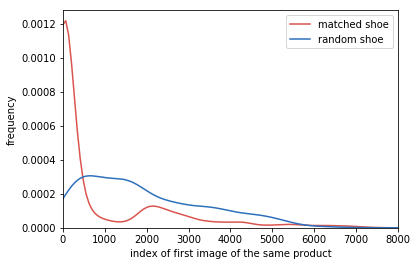

In [420]:
calc_rand_and_match_distributions(200,odf,oxf,'Oxfords')

In [43]:
def plot_zap_matches(num,oxf,odf,user_category='Oxfords',classifier='euclidean'):
    #min_prod_ranks,prod_placements = calc_min_product_ranks(num,oxf,odf,user_category='Oxfords',classifier=classifier)
    min_prod_ranks,prod_placements = calc_min_product_ranks(num,oxf,odf,user_category=None,classifier=classifier)
    fig = plt.figure(figsize=(7,5))
    all_prod_placements = list(itertools.chain.from_iterable(prod_placements))
    sns.distplot(all_prod_placements,label='zappos matches',kde=False,color=sns.xkcd_rgb["bright blue"])
    
    if user_category is not None:
        num_prods = len(odf[odf['subcategory']==user_category]['key'].unique())
    else:
        num_prods = len(odf['key'].unique())
    sns.distplot(np.random.randint(1,high=num_prods,size=len(all_prod_placements)),label='random shoes',kde=False,color=sns.xkcd_rgb["greyish"])
    plt.xlim(0,num_prods)
    #print(prod_placements)
    plt.legend()
    plt.xlabel('similar product ranking')
    plt.ylabel('count')
    plt.tight_layout()
    plt.savefig('large_seaborn_validation.png')
    plt.show()

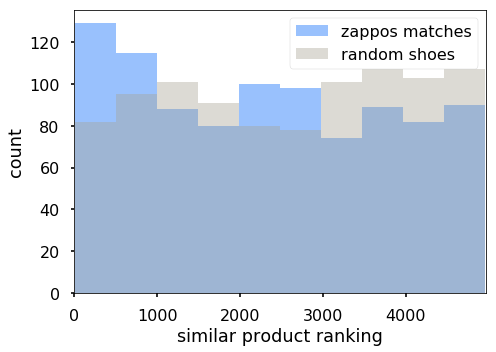

In [45]:
plot_zap_matches(300,oxf,odf,user_category=None)

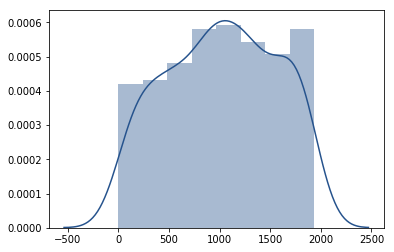

In [109]:
sns.distplot(list(itertools.chain.from_iterable(prod_placements)))

In [105]:
num = 100
min_prod_ranks,prod_placements = calc_min_product_ranks(num,oxf,odf,user_category='Oxfords')


oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
distances.shape : (1, 7792)
like_product_key: oxfords_product_9056559_color_753214
like_product_key: oxfords_product_8847071_color_184651
like_product_key: oxfords_product_9034387_color_184651
like_product_key: oxfords_product_9050415_color_691
product_indices: [524 525 526 527]
cur image_index key: oxfords_product_9056559_color_753214
image_index : 524
npwhere (this is rank) : [2777]
n rows of odf (should be same as rank...): (2777, 14)
num unique keys : 1253
cur image_index key: oxfords_product_9056559_color_753214
image_index : 525
npwhere (this is rank) : [5987]
n rows of odf (should be same as rank...): (5987, 14)
num unique keys : 1805
cur image_index key: oxfords_product_9056559_color_753214
image_index : 526
npwhere (this is rank) : [450]
n rows of odf (should be same as rank...): (450, 14)
num unique keys : 275
cur image_index key: oxfords_product_9056559_color_753214
image_index : 527
npwhere (this is rank) : [90

num unique keys : 1769
cur image_index key: oxfords_product_9034234_color_14
image_index : 2006
npwhere (this is rank) : [1259]
n rows of odf (should be same as rank...): (1259, 14)
num unique keys : 710
cur image_index key: oxfords_product_9034234_color_14
image_index : 2007
npwhere (this is rank) : [510]
n rows of odf (should be same as rank...): (510, 14)
num unique keys : 339
product_indices: []
oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
distances.shape : (1, 7792)
like_product_key: oxfords_product_9103465_color_3938
like_product_key: oxfords_product_8250801_color_3
like_product_key: oxfords_product_8430981_color_3
like_product_key: oxfords_product_8394125_color_72
product_indices: [4632 4633 4634 4635]
cur image_index key: oxfords_product_9103465_color_3938
image_index : 4632
npwhere (this is rank) : [5863]
n rows of odf (should be same as rank...): (5863, 14)
num unique keys : 1858
cur image_index key: oxfords_product_9103465_color_3938
image_index : 4633
npw

num unique keys : 1944
cur image_index key: oxfords_product_9049372_color_401
image_index : 6502
npwhere (this is rank) : [2558]
n rows of odf (should be same as rank...): (2558, 14)
num unique keys : 1400
cur image_index key: oxfords_product_9049372_color_401
image_index : 6503
npwhere (this is rank) : [2895]
n rows of odf (should be same as rank...): (2895, 14)
num unique keys : 1511
oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
distances.shape : (1, 7792)
like_product_key: oxfords_product_9076589_color_72
like_product_key: oxfords_product_8910357_color_72
like_product_key: oxfords_product_9059941_color_630925
like_product_key: oxfords_product_8859830_color_72
product_indices: [4048 4049 4050 4051]
cur image_index key: oxfords_product_9076589_color_72
image_index : 4048
npwhere (this is rank) : [6853]
n rows of odf (should be same as rank...): (6853, 14)
num unique keys : 1948
cur image_index key: oxfords_product_9076589_color_72
image_index : 4049
npwhere (this is 

oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
distances.shape : (1, 7792)
like_product_key: oxfords_product_9049416_color_3259
like_product_key: oxfords_product_9091479_color_310
like_product_key: oxfords_product_9053994_color_3
like_product_key: oxfords_product_9021098_color_6
product_indices: [3024 3025 3026 3027]
cur image_index key: oxfords_product_9049416_color_3259
image_index : 3024
npwhere (this is rank) : [639]
n rows of odf (should be same as rank...): (639, 14)
num unique keys : 424
cur image_index key: oxfords_product_9049416_color_3259
image_index : 3025
npwhere (this is rank) : [4571]
n rows of odf (should be same as rank...): (4571, 14)
num unique keys : 1668
cur image_index key: oxfords_product_9049416_color_3259
image_index : 3026
npwhere (this is rank) : [2119]
n rows of odf (should be same as rank...): (2119, 14)
num unique keys : 1054
cur image_index key: oxfords_product_9049416_color_3259
image_index : 3027
npwhere (this is rank) : [772]
n rows of

cur image_index key: oxfords_product_9005600_color_3
image_index : 4846
npwhere (this is rank) : [2784]
n rows of odf (should be same as rank...): (2784, 14)
num unique keys : 1501
cur image_index key: oxfords_product_9005600_color_3
image_index : 4847
npwhere (this is rank) : [1973]
n rows of odf (should be same as rank...): (1973, 14)
num unique keys : 1162
product_indices: [2244 2245 2246 2247]
cur image_index key: oxfords_product_9005604_color_3
image_index : 2244
npwhere (this is rank) : [4234]
n rows of odf (should be same as rank...): (4234, 14)
num unique keys : 1852
cur image_index key: oxfords_product_9005604_color_3
image_index : 2245
npwhere (this is rank) : [7784]
n rows of odf (should be same as rank...): (7784, 14)
num unique keys : 1948
cur image_index key: oxfords_product_9005604_color_3
image_index : 2246
npwhere (this is rank) : [5063]
n rows of odf (should be same as rank...): (5063, 14)
num unique keys : 1931
cur image_index key: oxfords_product_9005604_color_3
ima

product_indices: []
product_indices: [6824 6825 6826 6827]
cur image_index key: oxfords_product_9050639_color_216
image_index : 6824
npwhere (this is rank) : [4435]
n rows of odf (should be same as rank...): (4435, 14)
num unique keys : 1935
cur image_index key: oxfords_product_9050639_color_216
image_index : 6825
npwhere (this is rank) : [1250]
n rows of odf (should be same as rank...): (1250, 14)
num unique keys : 1246
cur image_index key: oxfords_product_9050639_color_216
image_index : 6826
npwhere (this is rank) : [5213]
n rows of odf (should be same as rank...): (5213, 14)
num unique keys : 1945
cur image_index key: oxfords_product_9050639_color_216
image_index : 6827
npwhere (this is rank) : [3407]
n rows of odf (should be same as rank...): (3407, 14)
num unique keys : 1916
oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
distances.shape : (1, 7792)
like_product_key: oxfords_product_8818422_color_72
like_product_key: oxfords_product_9056534_color_753212
like_produc

oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
distances.shape : (1, 7792)
like_product_key: oxfords_product_9098901_color_3
like_product_key: oxfords_product_8784244_color_112282
like_product_key: oxfords_product_9014475_color_20202
like_product_key: oxfords_product_8860827_color_2247
product_indices: [3456 3457 3458 3459]
cur image_index key: oxfords_product_9098901_color_3
image_index : 3456
npwhere (this is rank) : [5848]
n rows of odf (should be same as rank...): (5848, 14)
num unique keys : 1947
cur image_index key: oxfords_product_9098901_color_3
image_index : 3457
npwhere (this is rank) : [971]
n rows of odf (should be same as rank...): (971, 14)
num unique keys : 971
cur image_index key: oxfords_product_9098901_color_3
image_index : 3458
npwhere (this is rank) : [4810]
n rows of odf (should be same as rank...): (4810, 14)
num unique keys : 1943
cur image_index key: oxfords_product_9098901_color_3
image_index : 3459
npwhere (this is rank) : [2479]
n rows of odf

cur image_index key: oxfords_product_9000686_color_665
image_index : 995
npwhere (this is rank) : [1811]
n rows of odf (should be same as rank...): (1811, 14)
num unique keys : 1193
oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
distances.shape : (1, 7792)
like_product_key: oxfords_product_7809308_color_69
like_product_key: oxfords_product_7582583_color_240734
like_product_key: oxfords_product_104035_color_1292
like_product_key: oxfords_product_7932727_color_34904
product_indices: [2268 2269 2270 2271]
cur image_index key: oxfords_product_7809308_color_69
image_index : 2268
npwhere (this is rank) : [134]
n rows of odf (should be same as rank...): (134, 14)
num unique keys : 125
cur image_index key: oxfords_product_7809308_color_69
image_index : 2269
npwhere (this is rank) : [1898]
n rows of odf (should be same as rank...): (1898, 14)
num unique keys : 1079
cur image_index key: oxfords_product_7809308_color_69
image_index : 2270
npwhere (this is rank) : [6274]
n rows of

n rows of odf (should be same as rank...): (2569, 14)
num unique keys : 1279
oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
distances.shape : (1, 7792)
like_product_key: oxfords_product_8590697_color_239204
like_product_key: oxfords_product_9110375_color_189
like_product_key: oxfords_product_9100118_color_202581
like_product_key: oxfords_product_9136809_color_6
product_indices: [1500 1501 1502 1503]
cur image_index key: oxfords_product_8590697_color_239204
image_index : 1500
npwhere (this is rank) : [5241]
n rows of odf (should be same as rank...): (5241, 14)
num unique keys : 1948
cur image_index key: oxfords_product_8590697_color_239204
image_index : 1501
npwhere (this is rank) : [218]
n rows of odf (should be same as rank...): (218, 14)
num unique keys : 218
cur image_index key: oxfords_product_8590697_color_239204
image_index : 1502
npwhere (this is rank) : [2631]
n rows of odf (should be same as rank...): (2631, 14)
num unique keys : 1938
cur image_index key: oxfo

oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
distances.shape : (1, 7792)
like_product_key: oxfords_product_9031470_color_701912
like_product_key: oxfords_product_9034224_color_74411
like_product_key: oxfords_product_8836173_color_20
like_product_key: oxfords_product_8785169_color_184651
product_indices: [6748 6749 6750 6751]
cur image_index key: oxfords_product_9031470_color_701912
image_index : 6748
npwhere (this is rank) : [7594]
n rows of odf (should be same as rank...): (7594, 14)
num unique keys : 1948
cur image_index key: oxfords_product_9031470_color_701912
image_index : 6749
npwhere (this is rank) : [1844]
n rows of odf (should be same as rank...): (1844, 14)
num unique keys : 1733
cur image_index key: oxfords_product_9031470_color_701912
image_index : 6750
npwhere (this is rank) : [5062]
n rows of odf (should be same as rank...): (5062, 14)
num unique keys : 1947
cur image_index key: oxfords_product_9031470_color_701912
image_index : 6751
npwhere (this is ra

num unique keys : 1808
cur image_index key: oxfords_product_8266595_color_3
image_index : 2294
npwhere (this is rank) : [4514]
n rows of odf (should be same as rank...): (4514, 14)
num unique keys : 1842
cur image_index key: oxfords_product_8266595_color_3
image_index : 2295
npwhere (this is rank) : [4128]
n rows of odf (should be same as rank...): (4128, 14)
num unique keys : 1789
product_indices: []
oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
distances.shape : (1, 7792)
like_product_key: oxfords_product_9081908_color_329
like_product_key: oxfords_product_9078238_color_1083
like_product_key: oxfords_product_9006539_color_4392
like_product_key: oxfords_product_8912758_color_702025
product_indices: [7408 7409 7410 7411]
cur image_index key: oxfords_product_9081908_color_329
image_index : 7408
npwhere (this is rank) : [6709]
n rows of odf (should be same as rank...): (6709, 14)
num unique keys : 1948
cur image_index key: oxfords_product_9081908_color_329
image_index :

oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
distances.shape : (1, 7792)
like_product_key: oxfords_product_8558304_color_3
like_product_key: oxfords_product_8971483_color_4762
like_product_key: oxfords_product_8194856_color_3
like_product_key: oxfords_product_8490172_color_3
product_indices: [7604 7605 7606 7607]
cur image_index key: oxfords_product_8558304_color_3
image_index : 7604
npwhere (this is rank) : [3447]
n rows of odf (should be same as rank...): (3447, 14)
num unique keys : 1447
cur image_index key: oxfords_product_8558304_color_3
image_index : 7605
npwhere (this is rank) : [4976]
n rows of odf (should be same as rank...): (4976, 14)
num unique keys : 1691
cur image_index key: oxfords_product_8558304_color_3
image_index : 7606
npwhere (this is rank) : [937]
n rows of odf (should be same as rank...): (937, 14)
num unique keys : 607
cur image_index key: oxfords_product_8558304_color_3
image_index : 7607
npwhere (this is rank) : [2126]
n rows of odf (should 

oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
distances.shape : (1, 7792)
like_product_key: oxfords_product_8750380_color_20
like_product_key: oxfords_product_9102614_color_792253
like_product_key: oxfords_product_8735743_color_2865
like_product_key: oxfords_product_9089716_color_342
product_indices: [4544 4545 4546 4547]
cur image_index key: oxfords_product_8750380_color_20
image_index : 4544
npwhere (this is rank) : [3866]
n rows of odf (should be same as rank...): (3866, 14)
num unique keys : 1578
cur image_index key: oxfords_product_8750380_color_20
image_index : 4545
npwhere (this is rank) : [7248]
n rows of odf (should be same as rank...): (7248, 14)
num unique keys : 1939
cur image_index key: oxfords_product_8750380_color_20
image_index : 4546
npwhere (this is rank) : [3796]
n rows of odf (should be same as rank...): (3796, 14)
num unique keys : 1563
cur image_index key: oxfords_product_8750380_color_20
image_index : 4547
npwhere (this is rank) : [2789]
n rows 

oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
distances.shape : (1, 7792)
like_product_key: oxfords_product_9034358_color_1418
like_product_key: oxfords_product_9081908_color_494
like_product_key: oxfords_product_9094002_color_274418
like_product_key: oxfords_product_8956593_color_4854
product_indices: [4448 4449 4450 4451]
cur image_index key: oxfords_product_9034358_color_1418
image_index : 4448
npwhere (this is rank) : [6750]
n rows of odf (should be same as rank...): (6750, 14)
num unique keys : 1948
cur image_index key: oxfords_product_9034358_color_1418
image_index : 4449
npwhere (this is rank) : [2141]
n rows of odf (should be same as rank...): (2141, 14)
num unique keys : 1768
cur image_index key: oxfords_product_9034358_color_1418
image_index : 4450
npwhere (this is rank) : [4292]
n rows of odf (should be same as rank...): (4292, 14)
num unique keys : 1941
cur image_index key: oxfords_product_9034358_color_1418
image_index : 4451
npwhere (this is rank) : [328

n rows of odf (should be same as rank...): (4428, 14)
num unique keys : 1853
product_indices: [4644 4645 4646 4647]
cur image_index key: oxfords_product_9014625_color_435437
image_index : 4644
npwhere (this is rank) : [5716]
n rows of odf (should be same as rank...): (5716, 14)
num unique keys : 1933
cur image_index key: oxfords_product_9014625_color_435437
image_index : 4645
npwhere (this is rank) : [6250]
n rows of odf (should be same as rank...): (6250, 14)
num unique keys : 1944
cur image_index key: oxfords_product_9014625_color_435437
image_index : 4646
npwhere (this is rank) : [4257]
n rows of odf (should be same as rank...): (4257, 14)
num unique keys : 1837
cur image_index key: oxfords_product_9014625_color_435437
image_index : 4647
npwhere (this is rank) : [5471]
n rows of odf (should be same as rank...): (5471, 14)
num unique keys : 1922
oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
distances.shape : (1, 7792)
like_product_key: oxfords_product_9046939_color_

oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
distances.shape : (1, 7792)
like_product_key: oxfords_product_7532985_color_6008
like_product_key: oxfords_product_7235472_color_665
like_product_key: oxfords_product_8924362_color_641807
like_product_key: oxfords_product_7700836_color_202581
product_indices: [4192 4193 4194 4195]
cur image_index key: oxfords_product_7532985_color_6008
image_index : 4192
npwhere (this is rank) : [7737]
n rows of odf (should be same as rank...): (7737, 14)
num unique keys : 1948
cur image_index key: oxfords_product_7532985_color_6008
image_index : 4193
npwhere (this is rank) : [6026]
n rows of odf (should be same as rank...): (6026, 14)
num unique keys : 1937
cur image_index key: oxfords_product_7532985_color_6008
image_index : 4194
npwhere (this is rank) : [7535]
n rows of odf (should be same as rank...): (7535, 14)
num unique keys : 1948
cur image_index key: oxfords_product_7532985_color_6008
image_index : 4195
npwhere (this is rank) : [3

num unique keys : 1948
cur image_index key: oxfords_product_8868554_color_184651
image_index : 6087
npwhere (this is rank) : [7162]
n rows of odf (should be same as rank...): (7162, 14)
num unique keys : 1948
product_indices: []
oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
distances.shape : (1, 7792)
like_product_key: oxfords_product_8380784_color_72
like_product_key: oxfords_product_9077165_color_72
like_product_key: oxfords_product_9076552_color_3
like_product_key: oxfords_product_8910284_color_3
product_indices: [6504 6505 6506 6507]
cur image_index key: oxfords_product_8380784_color_72
image_index : 6504
npwhere (this is rank) : [6194]
n rows of odf (should be same as rank...): (6194, 14)
num unique keys : 1947
cur image_index key: oxfords_product_8380784_color_72
image_index : 6505
npwhere (this is rank) : [49]
n rows of odf (should be same as rank...): (49, 14)
num unique keys : 48
cur image_index key: oxfords_product_8380784_color_72
image_index : 6506
npwhere

oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
distances.shape : (1, 7792)
like_product_key: oxfords_product_8987290_color_72
like_product_key: oxfords_product_8910282_color_3
like_product_key: oxfords_product_9077165_color_72
like_product_key: oxfords_product_9085041_color_3
product_indices: [3176 3177 3178 3179]
cur image_index key: oxfords_product_8987290_color_72
image_index : 3176
npwhere (this is rank) : [4010]
n rows of odf (should be same as rank...): (4010, 14)
num unique keys : 1741
cur image_index key: oxfords_product_8987290_color_72
image_index : 3177
npwhere (this is rank) : [6302]
n rows of odf (should be same as rank...): (6302, 14)
num unique keys : 1948
cur image_index key: oxfords_product_8987290_color_72
image_index : 3178
npwhere (this is rank) : [1300]
n rows of odf (should be same as rank...): (1300, 14)
num unique keys : 816
cur image_index key: oxfords_product_8987290_color_72
image_index : 3179
npwhere (this is rank) : [2316]
n rows of odf (sh

n rows of odf (should be same as rank...): (1760, 14)
num unique keys : 1711
cur image_index key: oxfords_product_8892694_color_43361
image_index : 4523
npwhere (this is rank) : [1953]
n rows of odf (should be same as rank...): (1953, 14)
num unique keys : 1813
product_indices: [4732 4733 4734 4735]
cur image_index key: oxfords_product_9038409_color_820
image_index : 4732
npwhere (this is rank) : [5848]
n rows of odf (should be same as rank...): (5848, 14)
num unique keys : 1948
cur image_index key: oxfords_product_9038409_color_820
image_index : 4733
npwhere (this is rank) : [1935]
n rows of odf (should be same as rank...): (1935, 14)
num unique keys : 1808
cur image_index key: oxfords_product_9038409_color_820
image_index : 4734
npwhere (this is rank) : [1923]
n rows of odf (should be same as rank...): (1923, 14)
num unique keys : 1804
cur image_index key: oxfords_product_9038409_color_820
image_index : 4735
npwhere (this is rank) : [2063]
n rows of odf (should be same as rank...): (

cur image_index key: oxfords_product_8974146_color_3
image_index : 7743
npwhere (this is rank) : [3655]
n rows of odf (should be same as rank...): (3655, 14)
num unique keys : 1658
product_indices: [6452 6453 6454 6455]
cur image_index key: oxfords_product_8741478_color_72
image_index : 6452
npwhere (this is rank) : [4497]
n rows of odf (should be same as rank...): (4497, 14)
num unique keys : 1826
cur image_index key: oxfords_product_8741478_color_72
image_index : 6453
npwhere (this is rank) : [7051]
n rows of odf (should be same as rank...): (7051, 14)
num unique keys : 1947
cur image_index key: oxfords_product_8741478_color_72
image_index : 6454
npwhere (this is rank) : [1272]
n rows of odf (should be same as rank...): (1272, 14)
num unique keys : 813
cur image_index key: oxfords_product_8741478_color_72
image_index : 6455
npwhere (this is rank) : [3997]
n rows of odf (should be same as rank...): (3997, 14)
num unique keys : 1732
oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (

n rows of odf (should be same as rank...): (1387, 14)
num unique keys : 849
product_indices: [1336 1337 1338 1339]
cur image_index key: oxfords_product_8963750_color_3
image_index : 1336
npwhere (this is rank) : [4513]
n rows of odf (should be same as rank...): (4513, 14)
num unique keys : 1811
cur image_index key: oxfords_product_8963750_color_3
image_index : 1337
npwhere (this is rank) : [7543]
n rows of odf (should be same as rank...): (7543, 14)
num unique keys : 1948
cur image_index key: oxfords_product_8963750_color_3
image_index : 1338
npwhere (this is rank) : [2086]
n rows of odf (should be same as rank...): (2086, 14)
num unique keys : 1164
cur image_index key: oxfords_product_8963750_color_3
image_index : 1339
npwhere (this is rank) : [1375]
n rows of odf (should be same as rank...): (1375, 14)
num unique keys : 843
oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
distances.shape : (1, 7792)
like_product_key: oxfords_product_8763922_color_3
like_product_key: ox

oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
distances.shape : (1, 7792)
like_product_key: oxfords_product_8389035_color_3
like_product_key: oxfords_product_9092272_color_3
like_product_key: oxfords_product_9049506_color_6
like_product_key: oxfords_product_8952759_color_3
product_indices: [3180 3181 3182 3183]
cur image_index key: oxfords_product_8389035_color_3
image_index : 3180
npwhere (this is rank) : [3652]
n rows of odf (should be same as rank...): (3652, 14)
num unique keys : 1660
cur image_index key: oxfords_product_8389035_color_3
image_index : 3181
npwhere (this is rank) : [6087]
n rows of odf (should be same as rank...): (6087, 14)
num unique keys : 1937
cur image_index key: oxfords_product_8389035_color_3
image_index : 3182
npwhere (this is rank) : [3400]
n rows of odf (should be same as rank...): (3400, 14)
num unique keys : 1595
cur image_index key: oxfords_product_8389035_color_3
image_index : 3183
npwhere (this is rank) : [1705]
n rows of odf (should 

oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
distances.shape : (1, 7792)
like_product_key: oxfords_product_9113612_color_768
like_product_key: oxfords_product_8097377_color_699516
like_product_key: oxfords_product_9049476_color_3
like_product_key: oxfords_product_9090980_color_3
product_indices: [7084 7085 7086 7087]
cur image_index key: oxfords_product_9113612_color_768
image_index : 7084
npwhere (this is rank) : [2521]
n rows of odf (should be same as rank...): (2521, 14)
num unique keys : 1185
cur image_index key: oxfords_product_9113612_color_768
image_index : 7085
npwhere (this is rank) : [5051]
n rows of odf (should be same as rank...): (5051, 14)
num unique keys : 1713
cur image_index key: oxfords_product_9113612_color_768
image_index : 7086
npwhere (this is rank) : [1987]
n rows of odf (should be same as rank...): (1987, 14)
num unique keys : 1017
cur image_index key: oxfords_product_9113612_color_768
image_index : 7087
npwhere (this is rank) : [2336]
n rows 

oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
distances.shape : (1, 7792)
like_product_key: oxfords_product_9056534_color_753214
like_product_key: oxfords_product_9031471_color_743830
like_product_key: oxfords_product_9038389_color_20
like_product_key: oxfords_product_8983358_color_725806
product_indices: []
product_indices: [1324 1325 1326 1327]
cur image_index key: oxfords_product_9031471_color_743830
image_index : 1324
npwhere (this is rank) : [7063]
n rows of odf (should be same as rank...): (7063, 14)
num unique keys : 1938
cur image_index key: oxfords_product_9031471_color_743830
image_index : 1325
npwhere (this is rank) : [5096]
n rows of odf (should be same as rank...): (5096, 14)
num unique keys : 1751
cur image_index key: oxfords_product_9031471_color_743830
image_index : 1326
npwhere (this is rank) : [5951]
n rows of odf (should be same as rank...): (5951, 14)
num unique keys : 1854
cur image_index key: oxfords_product_9031471_color_743830
image_index : 132

npwhere (this is rank) : [736]
n rows of odf (should be same as rank...): (736, 14)
num unique keys : 491
cur image_index key: oxfords_product_9035402_color_80
image_index : 1919
npwhere (this is rank) : [1372]
n rows of odf (should be same as rank...): (1372, 14)
num unique keys : 849
oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
distances.shape : (1, 7792)
like_product_key: oxfords_product_9110306_color_183092
like_product_key: oxfords_product_9100200_color_3
like_product_key: oxfords_product_9100170_color_3
like_product_key: oxfords_product_9091903_color_72
product_indices: []
product_indices: [2140 2141 2142 2143]
cur image_index key: oxfords_product_9100200_color_3
image_index : 2140
npwhere (this is rank) : [2021]
n rows of odf (should be same as rank...): (2021, 14)
num unique keys : 1718
cur image_index key: oxfords_product_9100200_color_3
image_index : 2141
npwhere (this is rank) : [67]
n rows of odf (should be same as rank...): (67, 14)
num unique keys : 67


oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
distances.shape : (1, 7792)
like_product_key: oxfords_product_9098524_color_6
like_product_key: oxfords_product_8924403_color_3091
like_product_key: oxfords_product_8741481_color_20640
like_product_key: oxfords_product_8925991_color_216
product_indices: [3336 3337 3338 3339]
cur image_index key: oxfords_product_9098524_color_6
image_index : 3336
npwhere (this is rank) : [6423]
n rows of odf (should be same as rank...): (6423, 14)
num unique keys : 1896
cur image_index key: oxfords_product_9098524_color_6
image_index : 3337
npwhere (this is rank) : [5124]
n rows of odf (should be same as rank...): (5124, 14)
num unique keys : 1731
cur image_index key: oxfords_product_9098524_color_6
image_index : 3338
npwhere (this is rank) : [3289]
n rows of odf (should be same as rank...): (3289, 14)
num unique keys : 1405
cur image_index key: oxfords_product_9098524_color_6
image_index : 3339
npwhere (this is rank) : [1738]
n rows of odf

num unique keys : 1947
cur image_index key: oxfords_product_9031498_color_2552
image_index : 607
npwhere (this is rank) : [5315]
n rows of odf (should be same as rank...): (5315, 14)
num unique keys : 1944
product_indices: [5492 5493 5494 5495]
cur image_index key: oxfords_product_9097886_color_769652
image_index : 5492
npwhere (this is rank) : [4329]
n rows of odf (should be same as rank...): (4329, 14)
num unique keys : 1920
cur image_index key: oxfords_product_9097886_color_769652
image_index : 5493
npwhere (this is rank) : [1818]
n rows of odf (should be same as rank...): (1818, 14)
num unique keys : 1649
cur image_index key: oxfords_product_9097886_color_769652
image_index : 5494
npwhere (this is rank) : [1930]
n rows of odf (should be same as rank...): (1930, 14)
num unique keys : 1690
cur image_index key: oxfords_product_9097886_color_769652
image_index : 5495
npwhere (this is rank) : [1862]
n rows of odf (should be same as rank...): (1862, 14)
num unique keys : 1663
oxf_by_cat.

cur image_index key: oxfords_product_8803023_color_660653
image_index : 7478
npwhere (this is rank) : [3173]
n rows of odf (should be same as rank...): (3173, 14)
num unique keys : 1511
cur image_index key: oxfords_product_8803023_color_660653
image_index : 7479
npwhere (this is rank) : [2695]
n rows of odf (should be same as rank...): (2695, 14)
num unique keys : 1372
oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
distances.shape : (1, 7792)
like_product_key: oxfords_product_8948963_color_3
like_product_key: oxfords_product_9049506_color_6
like_product_key: oxfords_product_8520267_color_72
like_product_key: oxfords_product_8952186_color_3
product_indices: [2016 2017 2018 2019]
cur image_index key: oxfords_product_8948963_color_3
image_index : 2016
npwhere (this is rank) : [4759]
n rows of odf (should be same as rank...): (4759, 14)
num unique keys : 1948
cur image_index key: oxfords_product_8948963_color_3
image_index : 2017
npwhere (this is rank) : [1516]
n rows of o

n rows of odf (should be same as rank...): (4548, 14)
num unique keys : 1777
cur image_index key: oxfords_product_8971448_color_3
image_index : 4975
npwhere (this is rank) : [1990]
n rows of odf (should be same as rank...): (1990, 14)
num unique keys : 1083
product_indices: [732 733 734 735]
cur image_index key: oxfords_product_114292_color_72
image_index : 732
npwhere (this is rank) : [1944]
n rows of odf (should be same as rank...): (1944, 14)
num unique keys : 1061
cur image_index key: oxfords_product_114292_color_72
image_index : 733
npwhere (this is rank) : [7180]
n rows of odf (should be same as rank...): (7180, 14)
num unique keys : 1948
cur image_index key: oxfords_product_114292_color_72
image_index : 734
npwhere (this is rank) : [5102]
n rows of odf (should be same as rank...): (5102, 14)
num unique keys : 1867
cur image_index key: oxfords_product_114292_color_72
image_index : 735
npwhere (this is rank) : [2527]
n rows of odf (should be same as rank...): (2527, 14)
num unique

num unique keys : 1718
cur image_index key: oxfords_product_8743294_color_184651
image_index : 3998
npwhere (this is rank) : [6432]
n rows of odf (should be same as rank...): (6432, 14)
num unique keys : 1927
cur image_index key: oxfords_product_8743294_color_184651
image_index : 3999
npwhere (this is rank) : [4812]
n rows of odf (should be same as rank...): (4812, 14)
num unique keys : 1765
oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
distances.shape : (1, 7792)
like_product_key: oxfords_product_8836670_color_3
like_product_key: oxfords_product_9094136_color_3
like_product_key: oxfords_product_9033845_color_3
like_product_key: oxfords_product_8836238_color_3
product_indices: [2328 2329 2330 2331]
cur image_index key: oxfords_product_8836670_color_3
image_index : 2328
npwhere (this is rank) : [2304]
n rows of odf (should be same as rank...): (2304, 14)
num unique keys : 1119
cur image_index key: oxfords_product_8836670_color_3
image_index : 2329
npwhere (this is rank

oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
distances.shape : (1, 7792)
like_product_key: oxfords_product_9078238_color_1083
like_product_key: oxfords_product_9035261_color_216
like_product_key: oxfords_product_9006539_color_4392
like_product_key: oxfords_product_9094825_color_1912
product_indices: [5864 5865 5866 5867]
cur image_index key: oxfords_product_9078238_color_1083
image_index : 5864
npwhere (this is rank) : [7362]
n rows of odf (should be same as rank...): (7362, 14)
num unique keys : 1948
cur image_index key: oxfords_product_9078238_color_1083
image_index : 5865
npwhere (this is rank) : [1051]
n rows of odf (should be same as rank...): (1051, 14)
num unique keys : 995
cur image_index key: oxfords_product_9078238_color_1083
image_index : 5866
npwhere (this is rank) : [5998]
n rows of odf (should be same as rank...): (5998, 14)
num unique keys : 1944
cur image_index key: oxfords_product_9078238_color_1083
image_index : 5867
npwhere (this is rank) : [7096]


num unique keys : 980
cur image_index key: oxfords_product_8854355_color_3
image_index : 2986
npwhere (this is rank) : [1489]
n rows of odf (should be same as rank...): (1489, 14)
num unique keys : 920
cur image_index key: oxfords_product_8854355_color_3
image_index : 2987
npwhere (this is rank) : [4652]
n rows of odf (should be same as rank...): (4652, 14)
num unique keys : 1766
product_indices: [4484 4485 4486 4487]
cur image_index key: oxfords_product_8487935_color_3
image_index : 4484
npwhere (this is rank) : [6697]
n rows of odf (should be same as rank...): (6697, 14)
num unique keys : 1941
cur image_index key: oxfords_product_8487935_color_3
image_index : 4485
npwhere (this is rank) : [2769]
n rows of odf (should be same as rank...): (2769, 14)
num unique keys : 1380
cur image_index key: oxfords_product_8487935_color_3
image_index : 4486
npwhere (this is rank) : [4087]
n rows of odf (should be same as rank...): (4087, 14)
num unique keys : 1678
cur image_index key: oxfords_produc

oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
distances.shape : (1, 7792)
like_product_key: oxfords_product_8905199_color_2748
like_product_key: oxfords_product_8924410_color_261
like_product_key: oxfords_product_9038430_color_11
like_product_key: oxfords_product_9028088_color_242953
product_indices: [4688 4689 4690 4691]
cur image_index key: oxfords_product_8905199_color_2748
image_index : 4688
npwhere (this is rank) : [5421]
n rows of odf (should be same as rank...): (5421, 14)
num unique keys : 1792
cur image_index key: oxfords_product_8905199_color_2748
image_index : 4689
npwhere (this is rank) : [2646]
n rows of odf (should be same as rank...): (2646, 14)
num unique keys : 1234
cur image_index key: oxfords_product_8905199_color_2748
image_index : 4690
npwhere (this is rank) : [6218]
n rows of odf (should be same as rank...): (6218, 14)
num unique keys : 1883
cur image_index key: oxfords_product_8905199_color_2748
image_index : 4691
npwhere (this is rank) : [2187]

In [106]:
print('prod_placements: {}'.format(prod_placements))
print('min_prod_ranks: {}'.format(min_prod_ranks))

prod_placements: [[275, 1305, 1684, 285], [1247, 620, 1279], [704, 1226, 339], [1089, 703, 503, 515], [1073, 878, 374], [1724, 1692, 1400], [388, 189, 426], [1518, 1081, 667], [1371, 1901, 1793, 1800], [424, 1192, 377, 128], [1371, 1772, 1791], [1606, 1671, 1162, 1852], [1649, 1315, 1528], [1738, 416, 1640], [1910, 1518, 1246], [556, 883, 1681], [1934, 99, 1567, 709], [1603, 624, 976, 1427], [971, 1221, 1731], [1207, 293, 562, 1167], [40, 940, 362], [125, 1229, 873, 606], [1330, 1544, 1301, 1061], [1864, 1279], [218, 1091, 543], [1490, 1136, 663, 965], [134, 579, 805, 79], [1733, 244, 1783], [908, 1782, 904, 1095], [1239, 602, 1789], [572, 269, 660, 746], [457, 233], [1869, 1893, 1712], [607, 424, 1308], [840, 1118, 1228], [1658, 1879, 969, 1784], [1298, 1491, 1631, 324], [557, 1035, 478, 751], [942, 163], [1768, 1254, 727, 155], [921, 958, 33], [1274, 833, 1543, 1837], [805, 877], [1898, 1851], [1860, 1507, 1731], [1713, 849], [1685, 1491, 1736, 1851], [1782, 947, 1306], [447, 1467, 3

In [158]:
def calc_fraction_of_top_n_predictions(top_n,prod_placements):
    #total = len(prod_placements)
    total = 0
    num_lt_top_n = 0
    for product in prod_placements:
        #print(product)
        if len(product)>0:
            total +=1
            if min(product)<top_n:
                num_lt_top_n +=1
    return num_lt_top_n/float(total)

In [256]:
top_n = 100
frac_in_top_n = calc_fraction_of_top_n_predictions(top_n,prod_placements)
print('frac in top {}: {}%'.format(top_n,100*frac_in_top_n))

frac in top 100: 19.0%


In [260]:
top_n = 100
rand_frac_in_top_n = calc_random_top_n(top_n,odf[odf['subcategory']=='Oxfords'].shape[0],prod_placements)
print('rand frac in top {}: {}%'.format(top_n,100*rand_frac_in_top_n))

rand frac in top 100: 5.0%


In [259]:
def calc_random_top_n(top_n,number_products_in_category,prod_placements):
    total = 0
    num_lt_top_n = 0
    for product in prod_placements:
        if len(product)==0:
            continue
        else:
            ind_list = np.random.choice(number_products_in_category,len(product))
            total += 1
            if min(ind_list)<top_n:
                num_lt_top_n +=1
    return num_lt_top_n/float(total)
        

In [81]:
def calc_average_min_like_product_rank(num,oxf,odf,classifier='euclidean',user_category=None):
    average_mins_by_product = []
    
    for i in np.random.choice(oxf.shape[0],num):
        ranks_by_product = find_zap_ranks(i,oxf,odf)
        count = 0
        mins = []
        for like_product_list in ranks_by_product:
            if like_product_list is not None and len(like_product_list)==5:
                mins.append(min(like_product_list))
                count +=1

        #mins = [min(like_product_list) for like_product_list in ranks_by_product]
        avg = sum(mins)/float(count)
        average_mins_by_product.append(avg)
    return average_mins_by_product

In [76]:
np.random.choice(oxf.shape[0],num)

array([ 5111, 13961, 14113,  3290, 16226, 13825, 15877,  6023, 15455,
       16128, 20281,  6051,  8043, 10545,  7343, 13518, 17047,  6590,
        3490,  7101, 22775,   407, 13327, 15975, 14107,  1072, 13082,
       21183,  2163, 15767, 16978,  3526, 16890,  4045, 20436, 21590,
        1093,  4639,  7678,  6950, 13642, 22025,  8477,   390, 11605,
       19649, 18338, 15277, 12275, 21671,  1291,  3482,   906, 15741,
       16587, 16863, 22532, 21239, 12602, 22591, 16245, 11069,  4135,
       22170, 21430, 14761, 12957, 15454,   376,  5707,  2867, 12732,
       13427, 17507, 13147, 16810, 14219, 11416, 13132,  7031,  8948,
         192, 21835, 20223,  6183,  7606,  6552,  6526, 21835,  9088,
        8863, 15365, 13932, 21670, 13347, 13570, 11639, 16406,  7223,
        6232])

In [ ]:
def rank_zap_matches(input_image_index,oxf,odf,classifier='euclidean',user_category=None):
    best_row, frugal_row, premium_row, best_matches = find_top_matches(input_image_index,top_n,oxf,odf,classifier,user_category)
    print('Original Image')
    PATH = best_row['image_path']
    display(Image(filename = PATH, width=100, height=100))
    for i in range(len(best_matches)):
        sim1_PATH = best_matches[i]['image_path']
        like_keys = [best_row['like_product_key_{}'.format(lpi)] for lpi in range(4)]
        zap_sim = False
        if best_matches[i]['key'] in like_keys:
            zap_sim = True
        print('Similar Shoe: #{}, Zappos Similar: {}'.format(i+1,zap_sim))
        #print('path: {}'.format(PATH))
        display(Image(filename = sim1_PATH, width=100, height=100))

oxf_by_cat.shape : (20768, 4096) 
odf_by_cat.shape : (20768, 14) 
oxf.shape: (20768, 4096)
distances.shape : (1, 20768)
distances[best_args]: 
[ 0.         42.05758662 49.80433202 50.93504423 51.86499346 52.68031703
 53.46285876 53.60530177 53.83774564 53.85319574]
best_args: [ 1000  7244  2760 11896 10332  1238  6340  7247  1003 12480]
best_match_row : brand                                                               UGG
color                                                     Stout Leather
image_path            /Users/bechtel/Work/Insight/shoezam/zap_scrap/...
key                                  boots_product_8553807_color_241589
msrp                                                            $199.95
name                                                         Hendren TL
sale                                                                NaN
subcategory                                                       Boots
url                   https://www.zappos.com/p/ugg-hendren-tl-stout-

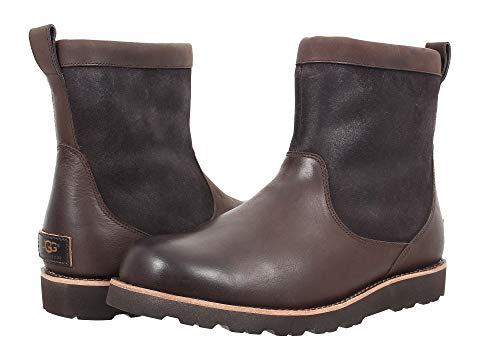

Similar Shoe: #1, Zappos Similar: False


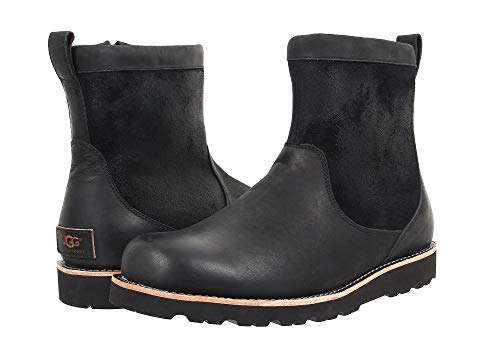

Similar Shoe: #2, Zappos Similar: False


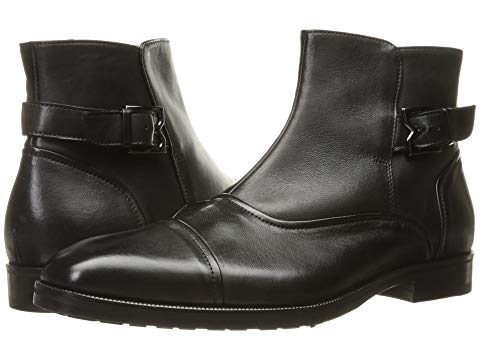

Similar Shoe: #3, Zappos Similar: False


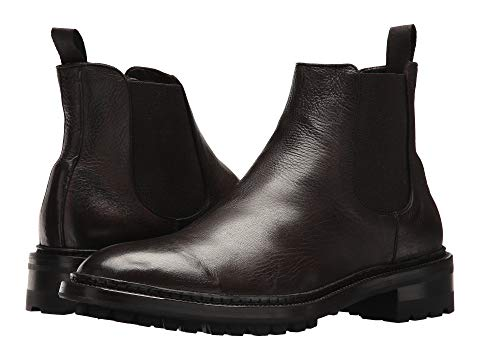

Similar Shoe: #4, Zappos Similar: False


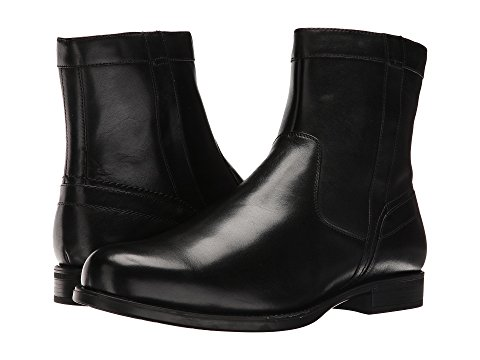

Similar Shoe: #5, Zappos Similar: False


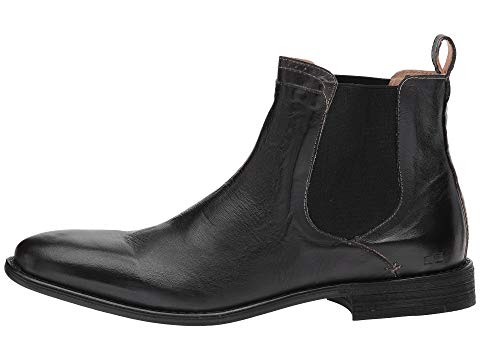

Similar Shoe: #6, Zappos Similar: False


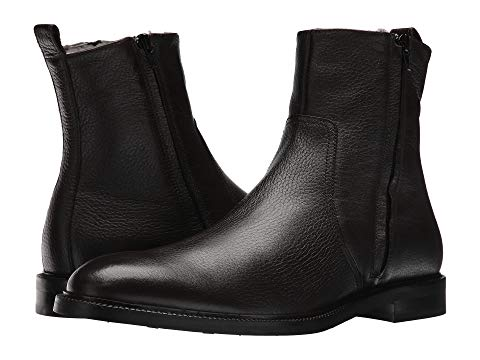

Similar Shoe: #7, Zappos Similar: False


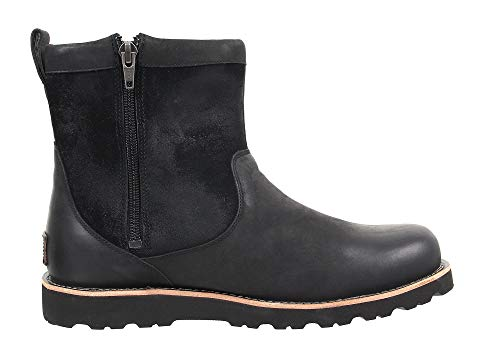

Similar Shoe: #8, Zappos Similar: False


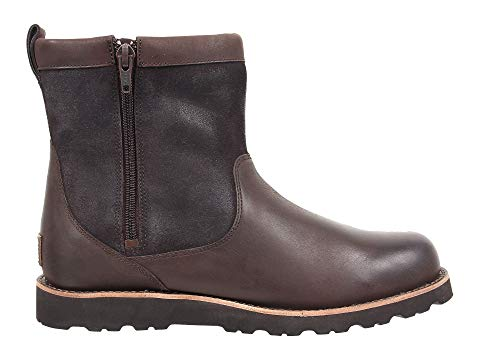

Similar Shoe: #9, Zappos Similar: False


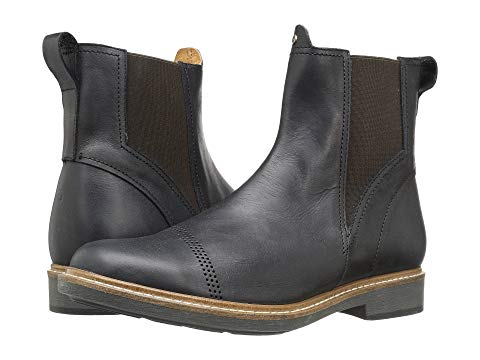

In [388]:
display_matches(1000,10,oxf,odf)

In [102]:
num = 10
min_product_ranks,prod_placements = calc_min_product_ranks(num,oxf,odf,classifier='euclidean',user_category=None)

NameError: name 'calc_min_product_ranks' is not defined

In [ ]:
for i in np.random.choice(np.arange(oxf.shape),100):
    min_product_ranks,prod_placements = calc_min_product_ranks(num,oxf,odf,classifier='euclidean',user_category=None)

In [62]:
input_image_index = 0
best_match_row,best_rows,ranks_by_product = find_zap_matches(input_image_index,oxf,odf,classifier='euclidean',user_category=None)

oxf_by_cat.shape : (22875, 4096) 
odf_by_cat.shape : (22875, 14) 
oxf.shape: (22875, 4096)
distances.shape : (1, 22875)
[150 151 152 153 154]
image_index : 150
npwhere : [20]
image_index : 151
npwhere : [8452]
image_index : 152
npwhere : [26]
image_index : 153
npwhere : [110]
image_index : 154
npwhere : [10843]
[530 531 532 533 534]
image_index : 530
npwhere : [140]
image_index : 531
npwhere : [8283]
image_index : 532
npwhere : [186]
image_index : 533
npwhere : [252]
image_index : 534
npwhere : [13976]
[170 171 172 173 174]
image_index : 170
npwhere : [21]
image_index : 171
npwhere : [8889]
image_index : 172
npwhere : [73]
image_index : 173
npwhere : [272]
image_index : 174
npwhere : [16670]
[190 191 192 193 194]
image_index : 190
npwhere : [2]
image_index : 191
npwhere : [6356]
image_index : 192
npwhere : [51]
image_index : 193
npwhere : [66]
image_index : 194
npwhere : [9695]
distances[best_args]: 
[  0.          40.1303115   43.00181037 ... 137.16075085 138.21454489
 139.04469913]
b

In [63]:
ranks_by_product

[[20, 8452, 26, 110, 10843],
 [140, 8283, 186, 252, 13976],
 [21, 8889, 73, 272, 16670],
 [2, 6356, 51, 66, 9695]]

In [32]:
like_product_indices

[array([150, 151, 152, 153, 154]),
 array([530, 531, 532, 533, 534]),
 array([170, 171, 172, 173, 174]),
 array([190, 191, 192, 193, 194])]

oxf_by_cat.shape : (22875, 4096) 
odf_by_cat.shape : (22875, 14) 
oxf.shape: (22875, 4096)
distances.shape : (1, 22875)
product_indices: []
product_indices: []
product_indices: []
product_indices: []


In [82]:
num = 5
avg_mins_by_product = calc_average_min_like_product_rank(num,oxf,odf)


oxf_by_cat.shape : (22875, 4096) 
odf_by_cat.shape : (22875, 14) 
oxf.shape: (22875, 4096)
distances.shape : (1, 22875)
[]
[7365 7366 7367 7368 7369]
image_index : 7365
npwhere : [9652]
image_index : 7366
npwhere : [205]
image_index : 7367
npwhere : [5730]
image_index : 7368
npwhere : [7726]
image_index : 7369
npwhere : [2109]
[]
[5225 5226 5227 5228 5229]
image_index : 5225
npwhere : [5817]
image_index : 5226
npwhere : [14]
image_index : 5227
npwhere : [5052]
image_index : 5228
npwhere : [10242]
image_index : 5229
npwhere : [3851]
oxf_by_cat.shape : (22875, 4096) 
odf_by_cat.shape : (22875, 14) 
oxf.shape: (22875, 4096)
distances.shape : (1, 22875)
[21645 21646 21647 21648 21649]
image_index : 21645
npwhere : [393]
image_index : 21646
npwhere : [17739]
image_index : 21647
npwhere : [28]
image_index : 21648
npwhere : [33]
image_index : 21649
npwhere : [13451]
[]
[22515 22516 22517 22518 22519]
image_index : 22515
npwhere : [1370]
image_index : 22516
npwhere : [17573]
image_index : 2251

In [85]:
np.mean(avg_mins_by_product)

174.35

In [413]:
def plot_image_array(image_index, odf,oxf):
    n=6
    input_feature_vec = oxf[image_index,:][None,:]
    sim1_PATH = odf.iloc[image_index,:]['image_path']
    print('Original Image')
    display(Image(filename = sim1_PATH, width=300, height=300))
    oxf = oxf[odf['view']==odf.iloc[image_index,:]['view'],:]
    odf = odf[odf['view']==odf.iloc[image_index,:]['view']]
    ind_list = np.random.choice(oxf.shape[0],n**2)
    f, axarr = plt.subplots(n, n,figsize=(12,12))
    count = 0

    oxf_by_cat = oxf[ind_list,:]
    odf_by_cat = odf.iloc[ind_list,:]
    #print('oxf.shape: {}'.format(oxf.shape))
    #distances = cdist(self.input_feature_vec,self.oxf, self.classifier)
    distances = cdist(input_feature_vec,oxf_by_cat, 'euclidean')
    #print('distances.shape : {}'.format(distances.shape))
    best_args = np.argsort(distances[0,:])[:]
    

    for i in range(n):
        for j in range(n):
            sim1_PATH = odf_by_cat.iloc[count,:]['image_path']
            #print('sim1_PATH: {}'.format(sim1_PATH))
            im_pil = PIL.Image.open(sim1_PATH)
            basewidth=400
            wpercent = (basewidth/float(im_pil.size[0]))
            hsize = int((float(im_pil.size[1])*float(wpercent)))
            im_pil = im_pil.resize((basewidth,hsize), PIL.Image.ANTIALIAS)
            #print('im_pil: {}'.format(im_pil))
            img_array = np.array(im_pil)
            #print('img_array.shape: {}'.format(img_array.shape))
            axarr[i,j].imshow(img_array)#
            
            axarr[i,j].get_xaxis().set_visible(False)
            axarr[i,j].get_yaxis().set_visible(False)
            if np.where(best_args==count)[0][0]<10:
                for axis in ['top','bottom','left','right']:
                    axarr[i,j].spines[axis].set_linewidth(4)
                    axarr[i,j].spines[axis].set_color('g')
            if np.where(best_args==count)[0][0]<3:
                for axis in ['top','bottom','left','right']:
                    axarr[i,j].spines[axis].set_linewidth(4)
                    axarr[i,j].spines[axis].set_color('r')
            count +=1
            #axarr[i,j].axhline(linewidth=4, color="r")        # inc. width of x-axis and color it green
            #axarr[i,j].axvline(linewidth=4, color="r")  
    plt.subplots_adjust(wspace=0.01, hspace=0.01)
    plt.savefig('test_img_array.png',dpi=300)
    plt.show()

In [416]:
image_index = 4000
sim1_PATH = odf.iloc[image_index,:]['image_path']
print('Original Image: path : {}'.format(sim1_PATH))

Original Image: path : /Users/bechtel/Work/Insight/shoezam/zap_scrap/scripts/images_boots/boots_product_8979079_color_275/boots_product_8979079_color_275_0.jpg


In [391]:
print(odf.shape)

(20768, 14)


In [5]:
im_index = 4000

plot_image_array(im_index,odf,oxf)

NameError: name 'plot_image_array' is not defined

In [406]:
odf[odf['key']=='oxfords_product_9008488_color_2865']['url'].iloc[0]

'https://www.zappos.com/p/florsheim-salerno-wingtip-oxford-cognac-smooth/product/9008488/color/2865'

In [401]:
odf['key'].unique()

array(['boats_product_9167575_color_68541',
       'boats_product_9043304_color_383', 'boats_product_125414_color_28',
       ..., 'oxfords_product_8912758_color_702472',
       'oxfords_product_8735738_color_2865',
       'oxfords_product_8910391_color_13978'], dtype=object)